In [107]:
import customize_motif_vec
from glypy.io import glycoct
import extract_motif
from glypy.algorithms.subtree_search import subtree_of
import customize_motif_vec
import glycan_io
import extract_motif
import motif_class
import __init__
import json_utility
import glycan_profile
from importlib import reload
import pandas as pd
reload(__init__)
reload(extract_motif)
reload(motif_class)
reload(glycan_profile)
import seaborn as sns
import plot_glycan_utilities
reload(plot_glycan_utilities)
import matplotlib.pyplot as plt
from glypy.io import glycoct, iupac
import numpy as np
from copy import deepcopy

%matplotlib inline


In [108]:
__init__.exact_Ture = False

# for HMO
# setting up the basic directory
root_ = "/Users/apple/PycharmProjects/GlyCompare/Figure/Data/CHO/"
__init__.num_processors = 4
# exact_Ture = True
__init__.json_address = root_ + "generated_json_file/"
__init__.motif_plot_address = root_ + "motif_plot/"
__init__.plot_output_address = root_ + "output_plot/"
__init__.source_address = root_ + "source_data/"

In [132]:
# load glycan structure
topology_list_addr = __init__.source_address+r'Glycan_topolog_list.txt'
glycan_dict_addr = __init__.json_address+'glycanCHO_dict.json'
glycan_motif_dict_addr = __init__.json_address+'glycanCHO_motif_dict.json'
glycan_dict = glycan_io.load_glycan_str_from_database(topology_list_addr=topology_list_addr, output_file=glycan_dict_addr, loader=glycoct)
# glycan_motif_dict = extract_motif.get_motif_pip(glycan_dict=glycan_dict, gly_len=23, output_file=glycan_motif_dict_addr)


There are  77 glycan id found;  77 glycans loaded


(RES 1b:x-dglc-HEX-1:5 2s:n-acetyl LIN 1:1d(2+1)2n: id=1  x=4.5924254968e-17 mod=0,
 <matplotlib.axes._subplots.AxesSubplot at 0x1317400f0>)

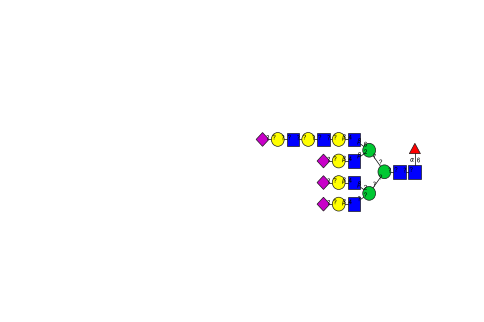

In [133]:
plot_glycan_utilities.plot_glycan(glycan_dict['5486.1'])

In [6]:
# merges the motif dict with the glycan dict because full chains are still considered motifs
# glycan_motif_dict_addr = json_address+'glycanCHO_motif_dict.json'
glycan_motif_dict = glycan_io.glycan_str_to_glycan(json_utility.load_json(glycan_motif_dict_addr))
merged_motif_dict_addr = __init__.json_address+"merged_motif_dict.json"
# merged_motif_dict = customize_motif_vec.merge_motif_dict_pipe(glycan_motif_dict, merged_motif_dict_addr)
# motif_vector = glycan_io.motif_dict_to_motif_vec(master_motif_dict)

In [7]:
#vectorizes the occurence of the motifs per glycan
# glycan_motif_dict = glycan_io.glycan_str_to_glycan(json_utility.load_json(glycan_motif_dict_addr))
# merged_motif_dict = glycan_io.glycan_str_to_glycan(json_utility.load_json(merged_motif_dict_addr))

matched_dict_addr = __init__.json_address+"match_dict.json"
motif_occurance_vector_dict = customize_motif_vec.motif_matching_wrapper(merged_motif_dict, glycan_motif_dict, matched_dict_addr)


1 6
2 9
3 12
4 16
5 23
6 32
7 45
8 60
9 83
10 111
11 143
12 173
13 194
14 201
15 188
16 157
17 115
18 73
19 38
20 16
21 5
22 1
1701
get motif vec, the length is  1701
start processing 3212.1
start processing G49604DB
start processing 2244.1
start processing G23295TF
start processing 3416.2
start processing G07568IR
start processing 4675.1
start processing G80393PG
start processing G05203UQ
start processing 3416.1
start processing G88966ZO
start processing G76812VG
start processing G40242TG
start processing G39764AC
start processing 2693.3
start processing G36191CD
start processing G54953LX
start processing 2646.1
start processing G99891PR
start processing 3055.1
start processing 4490.1
start processing G07483YN
start processing G03445UI
start processing 3143.1
start processing G90130AG
start processing G17689DH
start processing 1417.1
start processing G09280JF
start processing 3865.1
start processing G79457WN
start processing 5486.1
start processing 2693.2
start processing 2967.1
start

In [114]:
reload(glycan_profile)
match_dict = json_utility.load_json(__init__.json_address + "match_dict.json")
# load glycoprofile Mass Spectrum m/z and glycan structure info
# load CHO paper abundance table
cho_addr=__init__.source_address+'nbt.3280_cho.txt'
mz_abd_addr=__init__.source_address+'glycan_table.xls'
mz_abd_table = glycan_profile.load_cho_mz_abundance(cho_addr=cho_addr, mz_abd_addr=mz_abd_addr)

# load glycoprofile Mass Spectrum m/z and glycan structure info
profile_mz_to_id = glycan_profile.load_glycan_profile_dic()
# normalize CHO abundance table
norm_abd_table_dict_addr = __init__.json_address+"norm_mz_abd_dict.json"
norm_mz_abd_dict = glycan_profile.get_norm_mz_abd_table(mz_abd_table, norm_abd_table_dict_addr=norm_abd_table_dict_addr)

glycoprofile_list = glycan_profile.get_glycoprofile_list(profile_mz_to_id, norm_mz_abd_dict, match_dict, get_existance=True)
# get table generator and generate existance table
table_generator = glycan_profile.MotifAbdTableGenerator(glycoprofile_list)
motif_existance_table = table_generator.table_existance()
merged_motif_dict_addr = __init__.json_address+"merged_motif_dict.json"
# nglycan_motif_lab = motif_class.MotifLabwithCore(json_utility.load_json(merged_motif_dict_addr)) # unicarbkb_motifs_12259.json
# motif_vec = nglycan_motif_lab.motif_vec
# print(len(motif_vec))
# tree_type_dp, edge_list = nglycan_motif_lab.get_dependence_tree_core()

mz_list 57 profile_list 37
57 37


(RES 1b:b-dglc-HEX-1:5 2s:n-acetyl LIN 1:1d(2+1)2n: id=1  x=1.53080849893e-17 mod=0,
 <matplotlib.axes._subplots.AxesSubplot at 0x1442af4e0>)

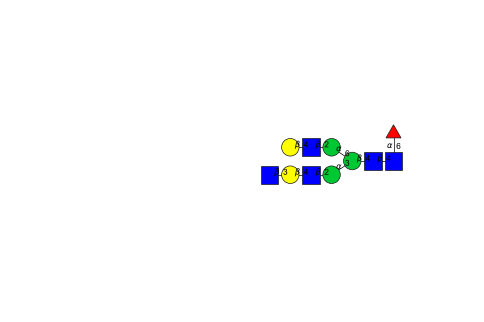

In [329]:
plot_glycan_utilities.plot_glycan(motif_vec[426])

In [330]:
# match_dict = json_utility.load_json(__init__.json_address + "match_dict.json")

print(glycoprofile_list[1].glycan_id_list)
for j in [0,5,6,7,8]:
    print(glycoprofile_list[j].glycan_id_list)
    for i in glycoprofile_list[j].glycan_id_list:
    #     j=glycoprofile_list['0']['glycan_id_list'][i]
#         print(j)
        print(match_dict[i][426], match_dict[i][563])

['G04483SK', 'G30460NZ', 'G17689DH', 'G54338PJ', '3865.1', 'G86696LV', '4587.1', 'G49604DB']
['G04483SK', 'G30460NZ', 'G17689DH', 'G54338PJ', '3865.1', 'G86696LV', '4587.1', 'G49604DB', '5486.1']
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
2 2
['G07483YN', 'G80858MF', 'G80393PG', 'G00176HZ', 'G79457WN', 'G79412GP', 'G40242TG', '3457.1', 'G76812VG', 'G80264ZA', 'G86696LV', '4587.1', 'G49604DB']
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
['G04483SK', 'G30460NZ', 'G17689DH', 'G54338PJ', 'G76812VG', '3865.1', 'G86696LV', '4587.1', 'G09280JF', 'G49604DB', '5486.1']
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
2 2
2 2
['G30460NZ', 'G17689DH', 'G54338PJ', 'G76812VG', '3865.1', 'G86696LV', '4587.1', 'G09280JF', 'G49604DB', '5486.1']
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
2 2
2 2
['G17689DH', 'G54338PJ', 'G76812VG', 'G86696LV', '4587.1', 'G49604DB', '5486.1']
0 0
0 0
0 0
0 0
0 0
2 2
2 2


# modify the table

In [6]:
selected_name_list = ["EPO127.mgat1.",
"EPO174.mgat2.",
"EPO266.fut8.",
"st3gal4.st3gal6.mgat4a.mgat4b.mgat5",
"KI_ST6GalNAc1.st3gal4.st3gal6.mgat4a.mgat4b.mgat5",
"mgat4A.mgat4B.mgat5",
"B3gnt2.mgat4a.mgat4b.mgat5",
"st3gal4.st3gal6",
"B4GalT1",
"B4GalT2",
"B4GalT3",
"WT",
"B4GalT4",
"EPO78.mgat4B.",
"mgat4A.mgat4B",
"mgat5"]
# selected_name_list = [
# "mgat4A.mgat4B",
# "WT",]
_table_col=[]
reload(__init__)
_ = dict(zip(__init__.aaa_re, range(1,len(__init__.aaa_re)+1)))
# _name_r2py = dict(zip(__init__.aaa_re, __init__.aaa))
for i in selected_name_list:
    _table_col.append(int(_[i]))
print(_table_col)

# motif_existance_table[_table_col].head()


[30, 25, 34, 21, 22, 5, 20, 18, 6, 7, 8, 1, 9, 28, 3, 4]


(RES 1b:b-dgal-HEX-1:5: id=1  x=0.0 mod=0,
 <matplotlib.axes._subplots.AxesSubplot at 0x11baec438>)

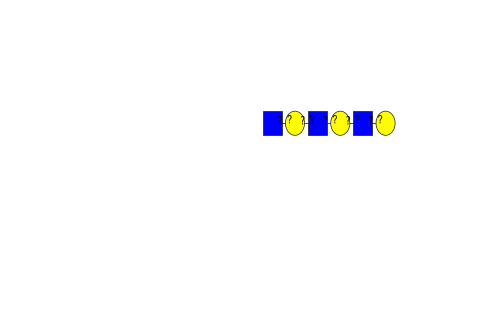

In [47]:
plot_glycan_utilities.plot_glycan(motif_vec[96])

In [59]:
reload(motif_class)
_a = motif_class.NodesState(nglycan_motif_lab.motif_dep_tree_core, motif_class.get_weight_dict(table_generator.table_against_wt_relative_abd()[_table_col]))
len(_a.nodes)

# node_mean, node_var = _a.get_node_sta()
# node_corr, node_pvalue = _a.get_node_value()
# node_table = pd.DataFrame({'node':_a.nodes, 'node_mean':node_mean, 'node_var':node_var, 'out_d':_a._out_degree_list, 'in_d':_a._in_degree_list, 'p_value':node_pvalue, 'correlation':node_corr})
# node_table.head()
_,_,mod_nodes,_, merged_weights_dict=_a.nodes_dropping_pipe(drop_parellel=False, drop_diff_abund=True)
# # _a.nodes_dropping_pipe(drop_parellel=False, drop_diff_abund=False)

# _collapsed_edge, _collapsed_node, _collapsed_dege_attri = _a.collapsing_potential_node()
# print(len(_collapsed_node))
# print(len(_collapsed_edge))
# _a.upload_network(_collapsed_edge, _collapsed_node, edge_attri = _collapsed_dege_attri,add_notimp_edge=True)

Nodes dropped [96, 139, 140, 199, 200, 201, 282, 283, 284, 285, 390, 391, 392, 393, 394, 395, 396, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1254, 1255, 1256, 1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431, 14

# Draw Table

[77, 84, 92, 104, 115, 120, 136, 151, 167, 168, 173, 184, 202, 212, 214, 216, 227, 231, 232, 237, 256, 288, 302, 303, 314, 316, 322, 328, 332, 341, 343, 344, 351, 400, 403, 414, 416, 426, 430, 439, 440, 447, 450, 451, 452, 454, 487, 500, 563, 571, 575, 577, 586, 588, 589, 599, 606, 641, 724, 726, 729, 740, 746, 748, 750, 751, 752, 800, 810, 814, 909, 915, 920, 923, 924, 927, 928, 930, 932, 982, 985, 986, 1109, 1110, 1111, 1118, 1119, 1120, 1121, 1122, 1134, 1158, 1251, 1296, 1298, 1301, 1302, 1303, 1305, 1326, 1327, 1407, 1455, 1467, 1479, 1535, 1568, 1571, 1572, 1578, 1584, 1618, 1640, 1641, 1643, 1644, 1647, 1679, 1695, 1700]
(120, 16)


{}

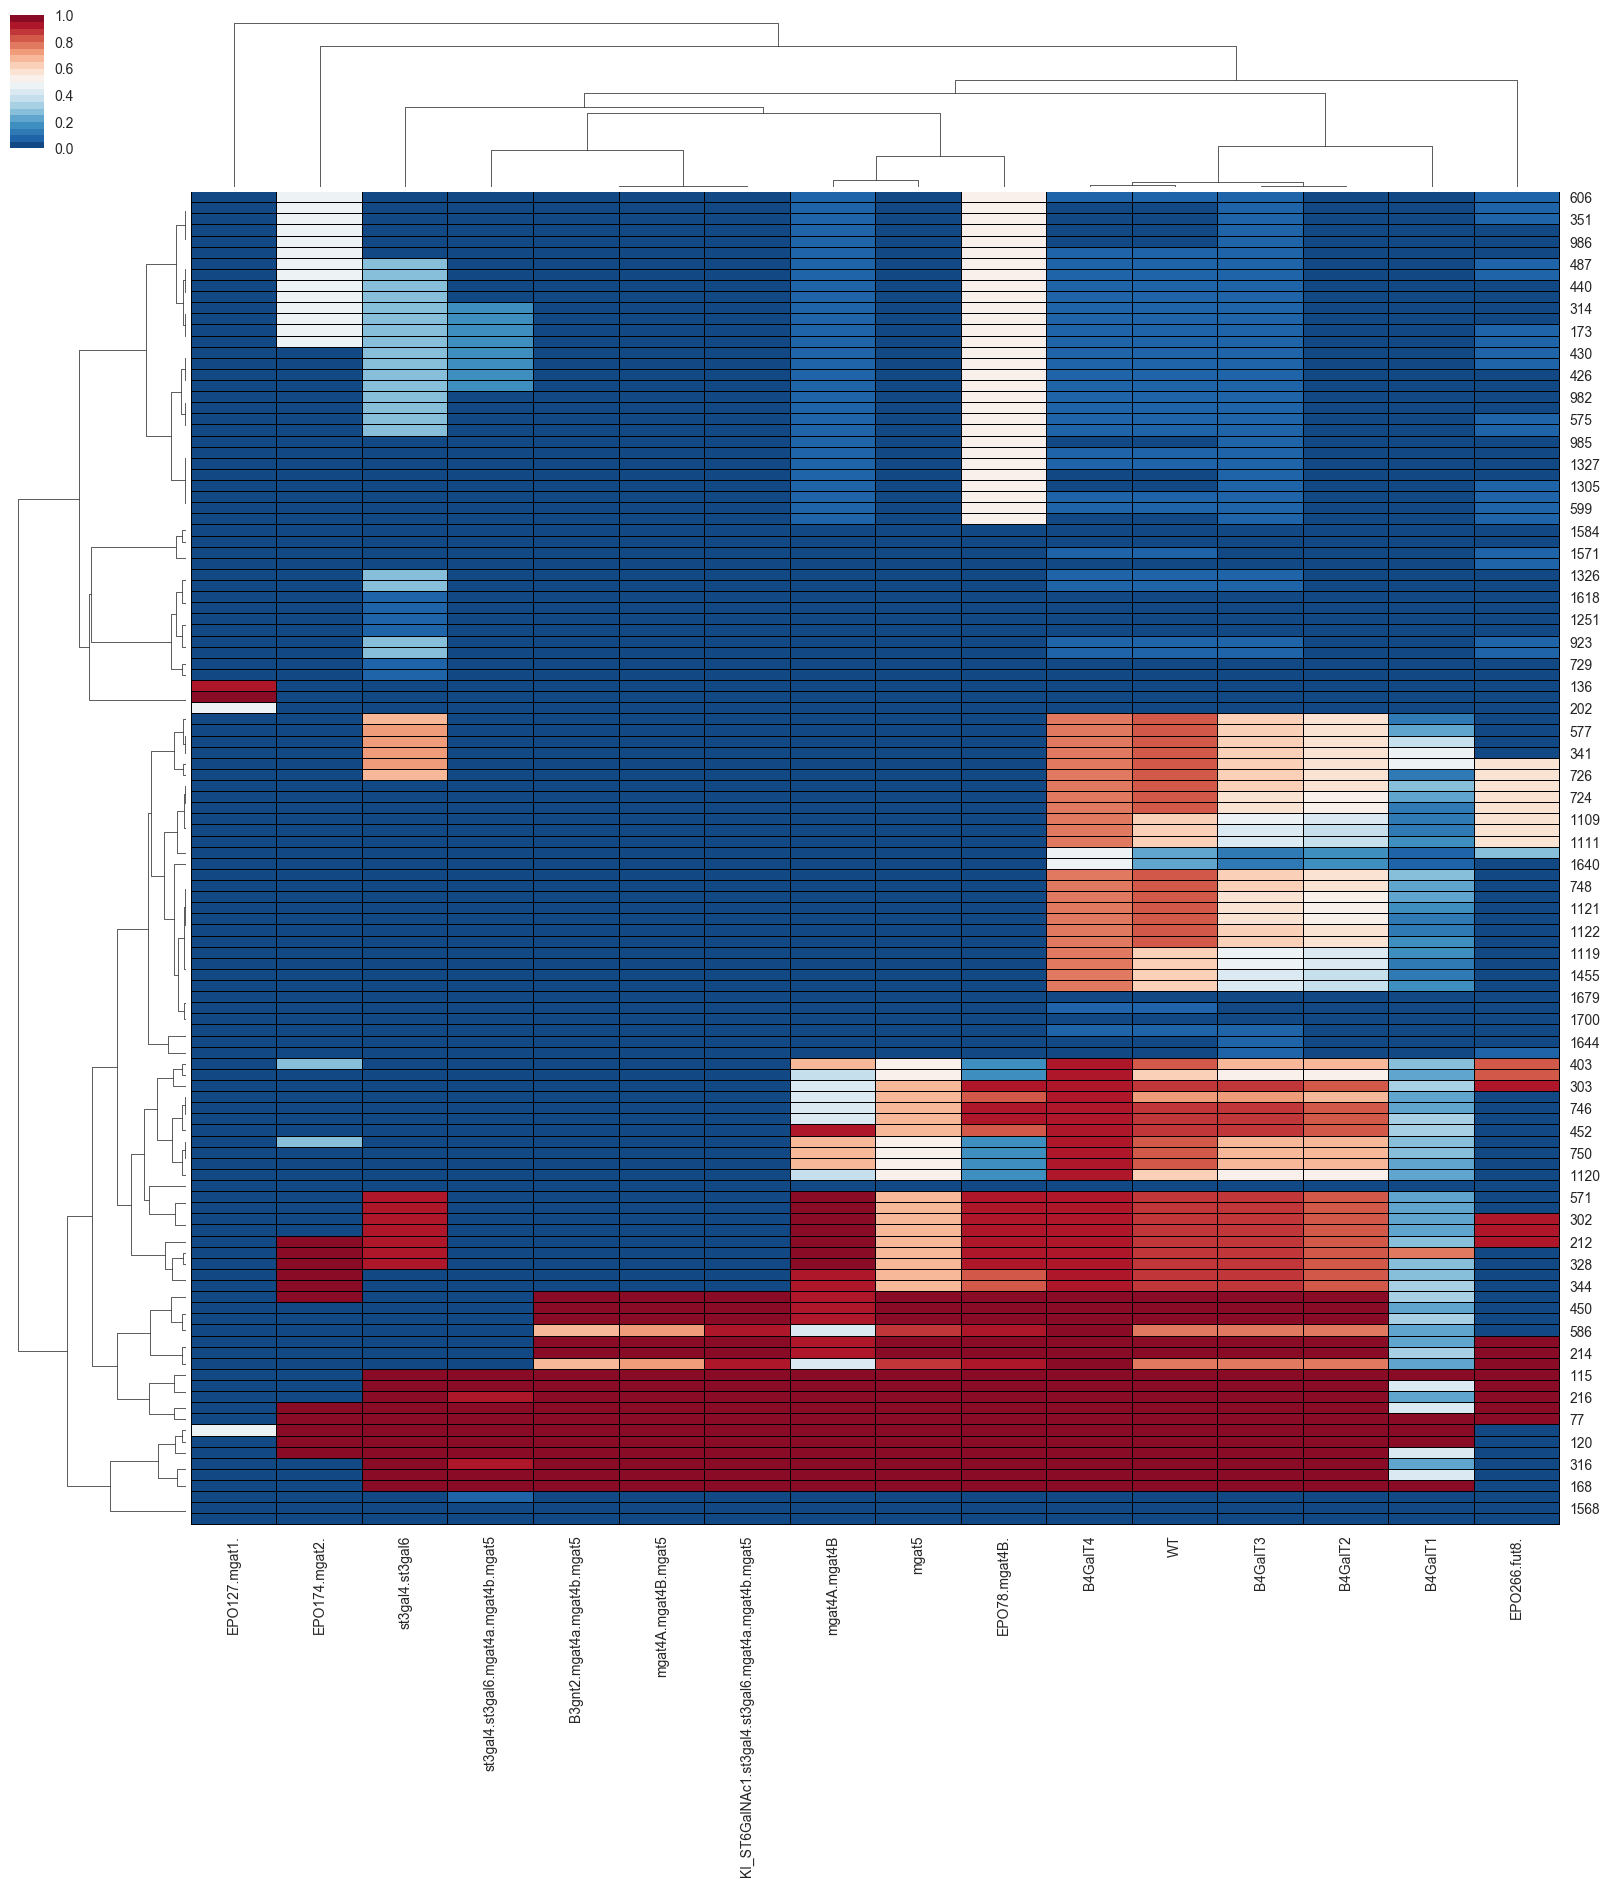

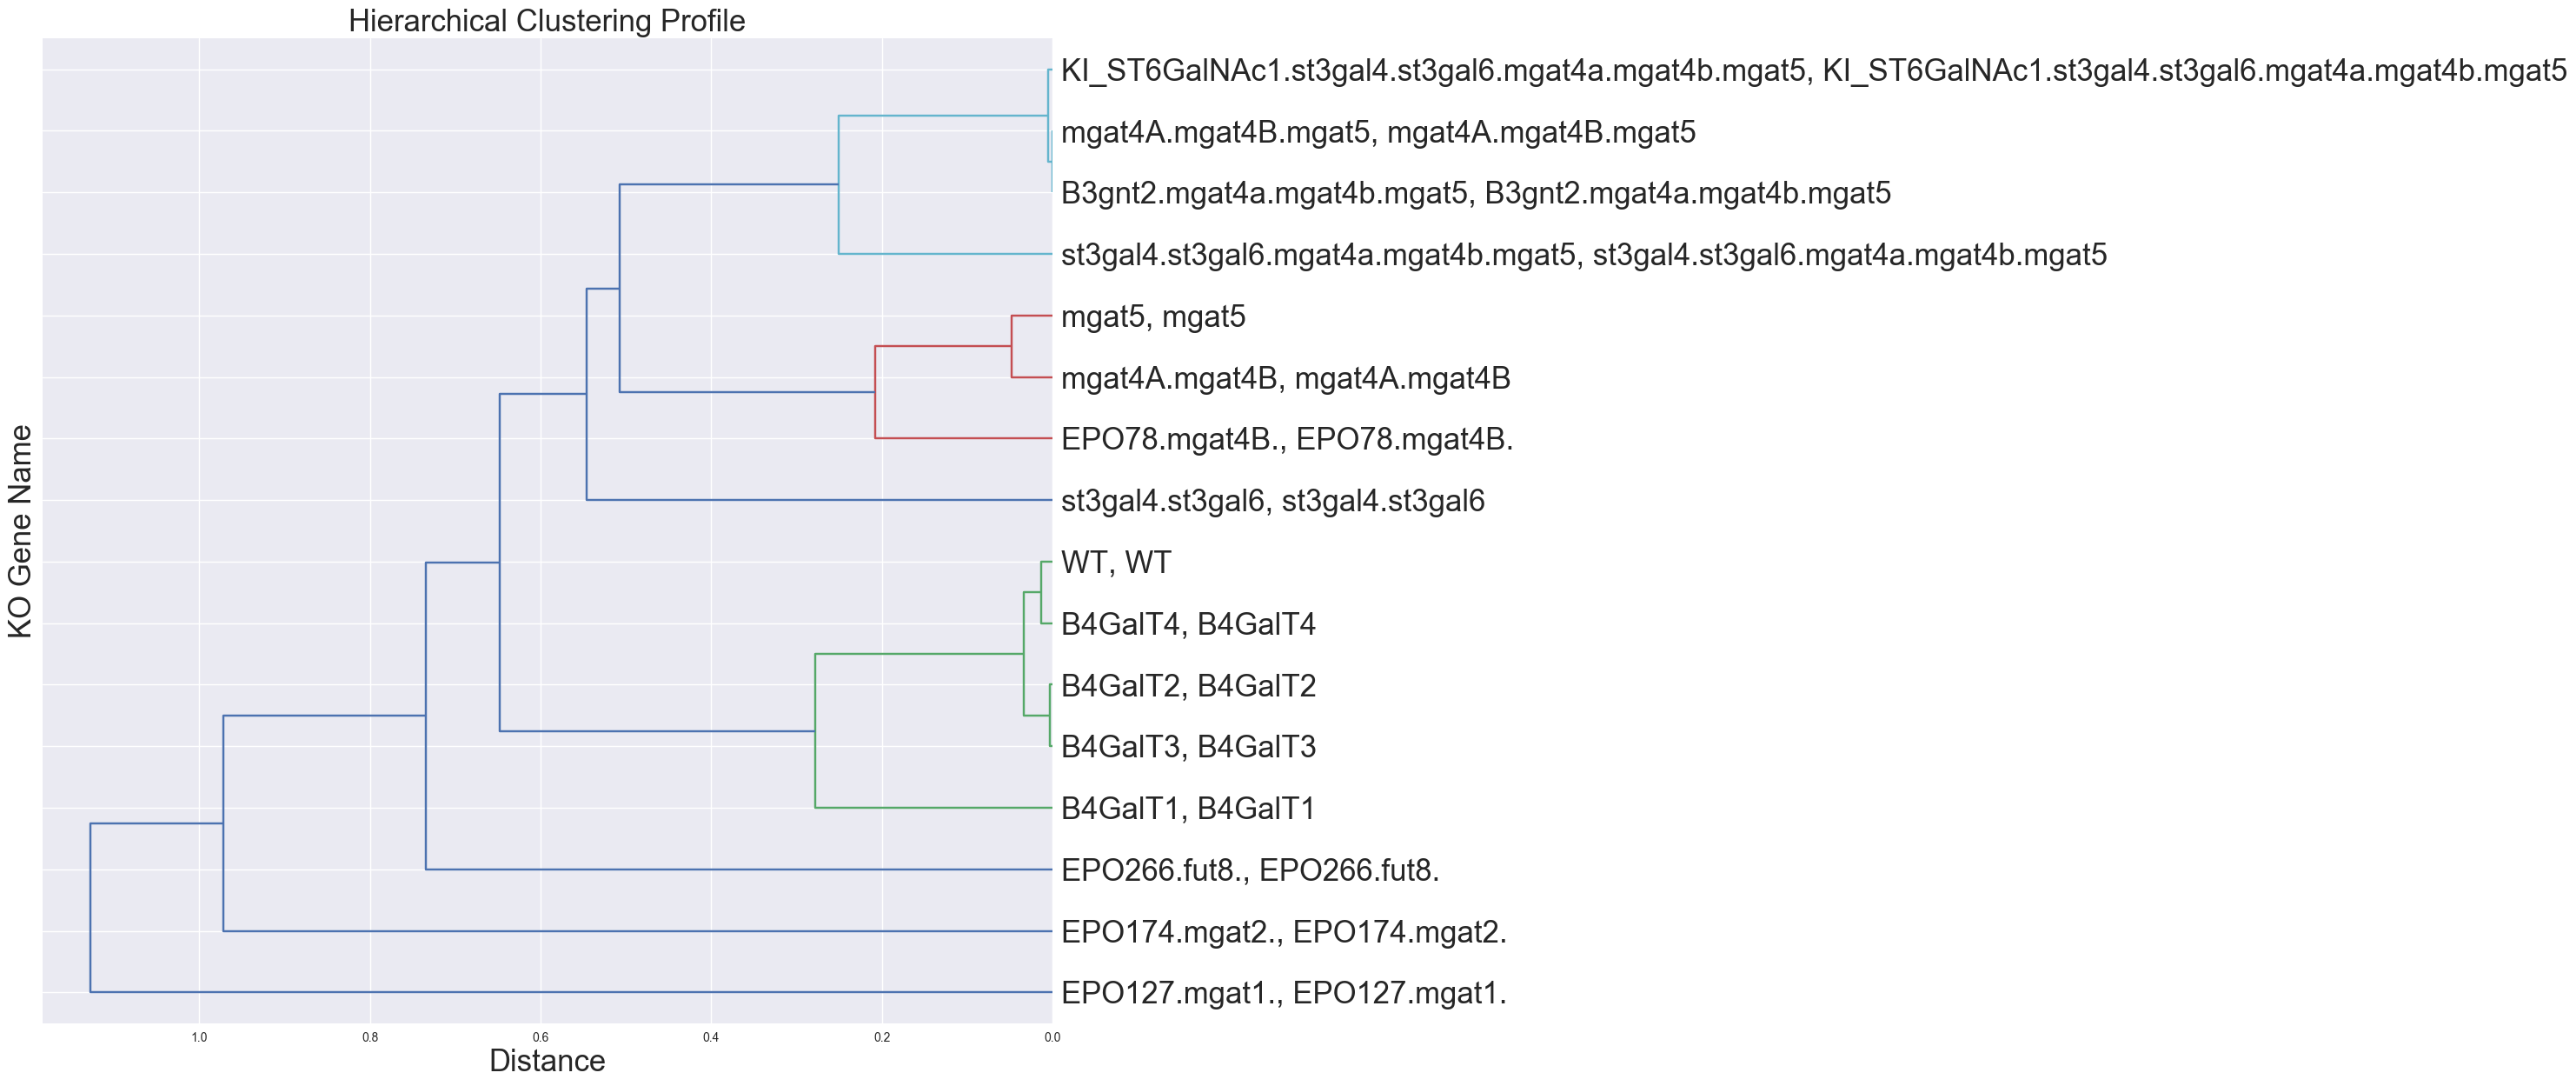

In [372]:
import seaborn as sns
import clustering_analysis_pip
import scipy
reload(clustering_analysis_pip)
# sns.set("RdBu_r", 7)
# dropper.drop_node()
# print("", len(dropper.drop_node()))
motif_abd_table =  table_generator.table_against_wt_relative_abd()[_table_col]


if 51 in mod_nodes:
    mod_nodes.remove(51)
# print(motif_abd_table.head())
df_ncore = deepcopy(motif_abd_table[motif_abd_table.index.isin(mod_nodes)])
print(sorted(mod_nodes))
print(df_ncore.shape)
# draw plot
# motif_with_n_glycan_core_all_motif(motif_, _table, weight_dict)
""" with n_glycan_core using jaccard for binary and use braycurtis for float
"""
df_ncore.columns=selected_name_list
from sklearn import preprocessing
import numpy as np

# df_ncore=pd.DataFrame(data=preprocessing.scale(df_ncore.transpose()).transpose(), index=df_ncore.index, columns=df_ncore.columns)
df_ncore.to_csv(__init__.json_address + str(len(selected_name_list))+r"selected_abundance_matrix.txt")
motif_abd_table.colmuns=selected_name_list
# motif_abd_table.to_csv(__init__.json_address + r"full_abundance_matrix.txt")
name_prefix = 'dropped'
# sns.palplot(sns.color_palette("RdBu_r", 7))
# help(scipy.cluster.hierarchy.dendrogram)
g = sns.clustermap(df_ncore, metric="correlation", cmap=sns.color_palette("RdBu_r", 20), linewidths=.02,figsize=(20,20),linecolor='black',method='complete')
plt.savefig(__init__.plot_output_address+'pseudo_profile_clustering.svg')
clustering_analysis_pip.draw_profile_cluster(g, df_ncore, selected_name_list, name_prefix, color_threshold=0.5)

# motif_abd_table
 

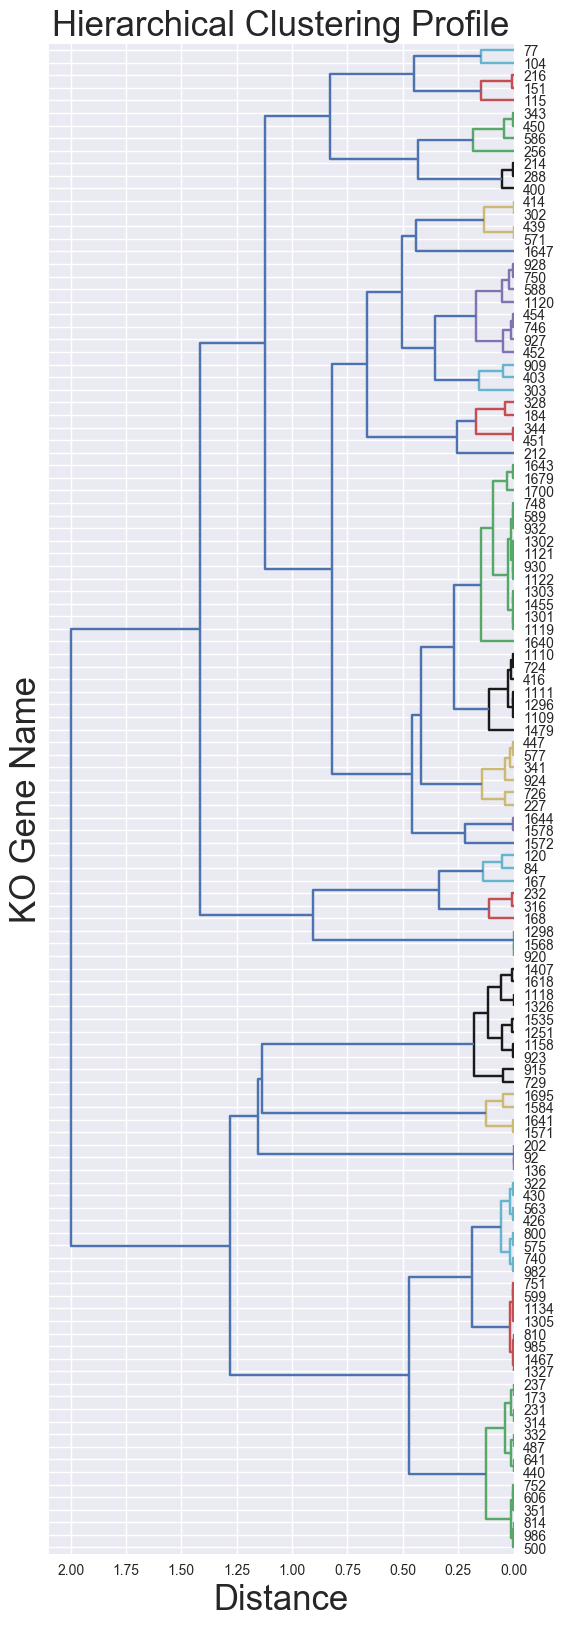

In [325]:
reload(clustering_analysis_pip)
cccluster_dict = clustering_analysis_pip.draw_motif_cluster(g, df_ncore, name_prefix, color_threshold=0.185, fig_size=(6, 20))
# plot_glycan_utilities.plot_glycan_list([motif_vec[i] for i in nodes_selected], nodes_selected, addr = root_addr+name_prefix+"motif.eps")

In [377]:
cccluster_dict

{1: [173, 231, 237, 314, 332, 351, 440, 487, 500, 606, 641, 752, 814, 986],
 2: [322, 426, 430, 563, 575, 740, 800, 982],
 3: [599, 751, 810, 985, 1134, 1305, 1327, 1467],
 4: [1571, 1584, 1641, 1695],
 5: [729, 915, 923, 1118, 1158, 1251, 1326, 1407, 1535, 1618],
 6: [92, 136, 202],
 7: [227, 341, 447, 577, 726, 924],
 8: [416, 724, 1109, 1110, 1111, 1296, 1479],
 9: [589,
  748,
  930,
  932,
  1119,
  1121,
  1122,
  1301,
  1302,
  1303,
  1455,
  1640,
  1643,
  1679,
  1700],
 10: [1578, 1644],
 11: [1572],
 12: [303, 403, 909],
 13: [452, 454, 588, 746, 750, 927, 928, 1120],
 14: [302, 414, 439, 571],
 15: [1647],
 16: [184, 328, 344, 451],
 17: [212],
 18: [256, 343, 450, 586],
 19: [214, 288, 400],
 20: [115, 151, 216],
 21: [77, 104],
 22: [84, 120, 167],
 23: [168, 232, 316],
 24: [920, 1298, 1568]}

24
120
[173, 231, 237, 314, 332, 351, 440, 487, 500, 606, 641, 752, 814, 986]
[322, 426, 430, 563, 575, 740, 800, 982]
[599, 751, 810, 985, 1134, 1305, 1327, 1467]
[1571, 1584, 1641, 1695]
[729, 915, 923, 1118, 1158, 1251, 1326, 1407, 1535, 1618]
[92, 136, 202]
[227, 341, 447, 577, 726, 924]
[416, 724, 1109, 1110, 1111, 1296, 1479]
[589, 748, 930, 932, 1119, 1121, 1122, 1301, 1302, 1303, 1455, 1640, 1643, 1679, 1700]
[1578, 1644]
[1572]
[303, 403, 909]
[452, 454, 588, 746, 750, 927, 928, 1120]
[302, 414, 439, 571]
[1647]
[184, 328, 344, 451]
[212]
[256, 343, 450, 586]
[214, 288, 400]
[115, 151, 216]
[77, 104]
[84, 120, 167]
[168, 232, 316]
[920, 1298, 1568]


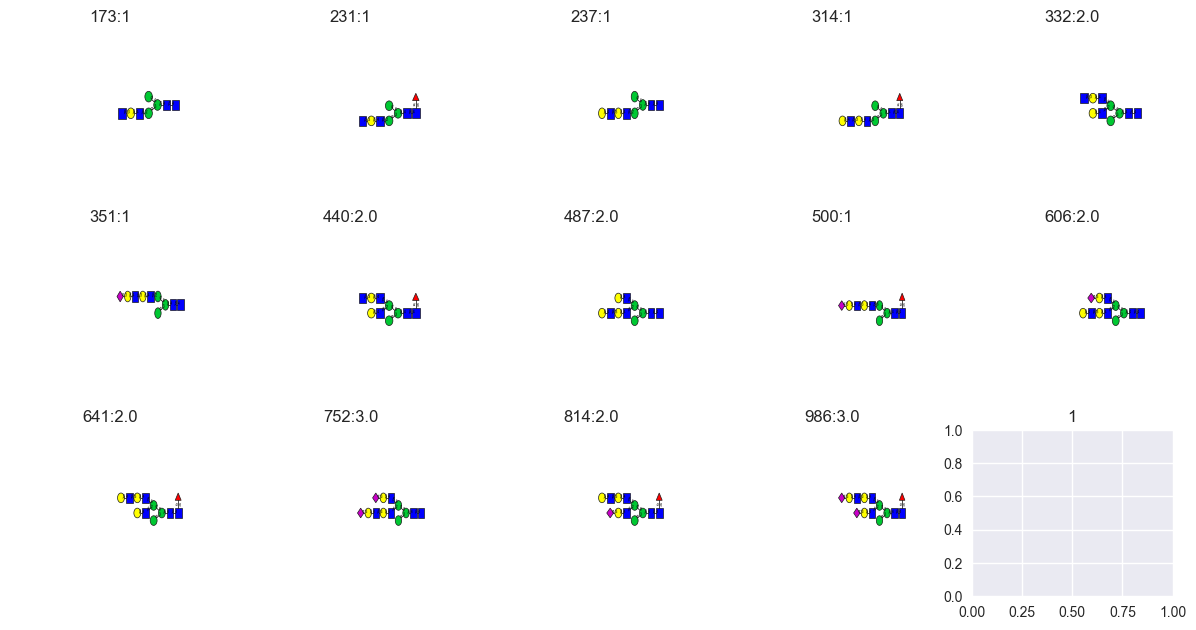

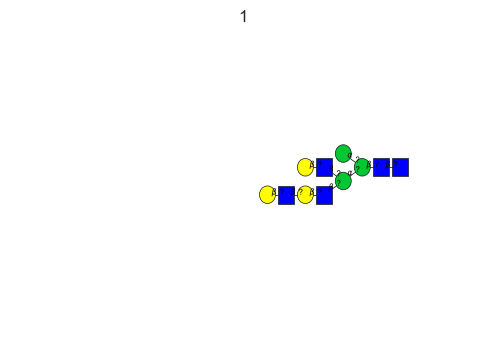

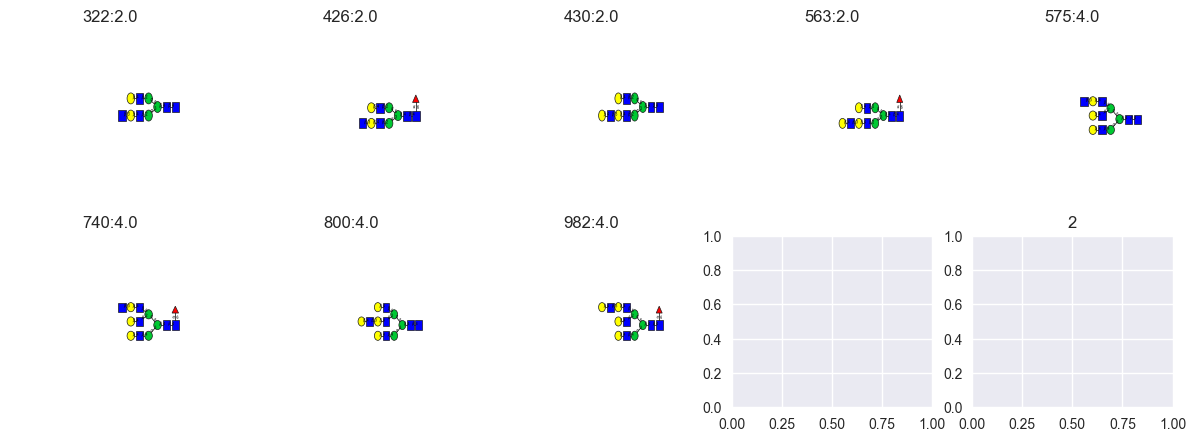

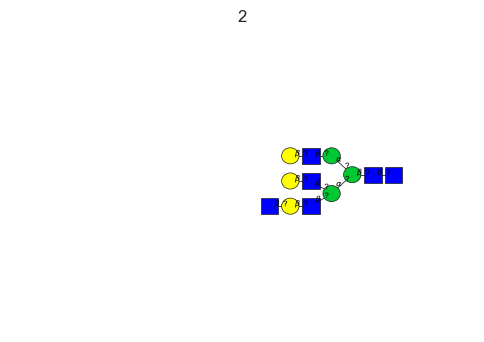

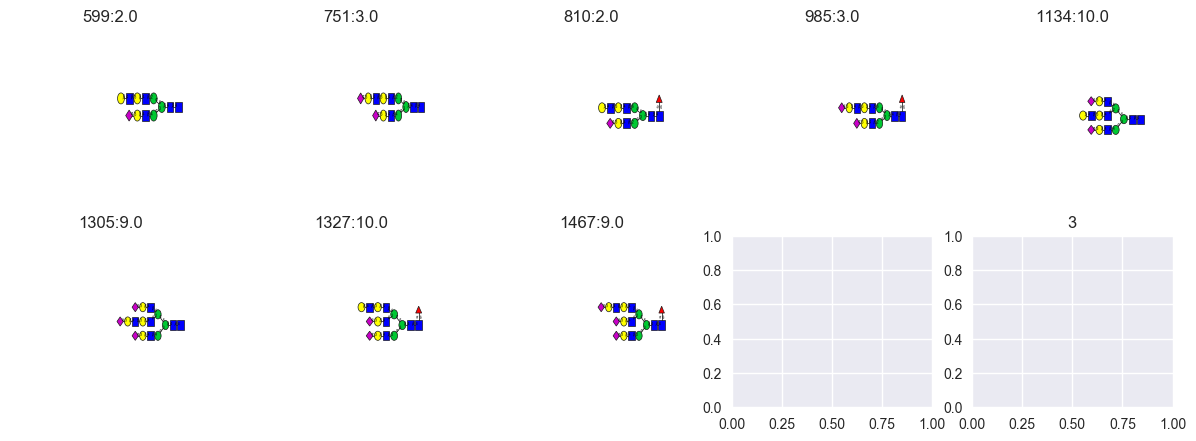

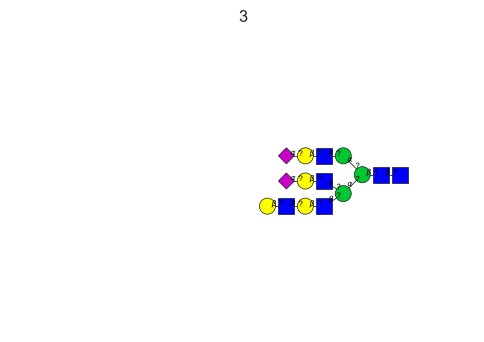

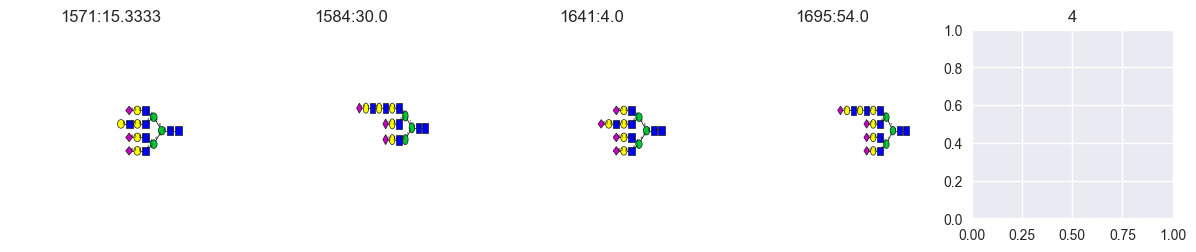

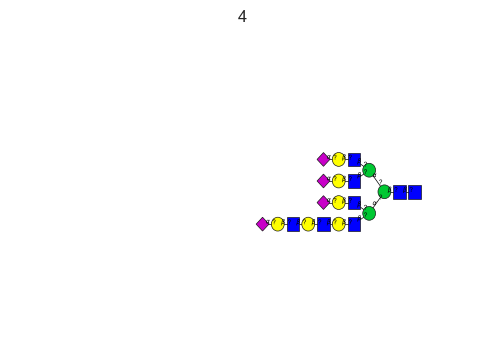

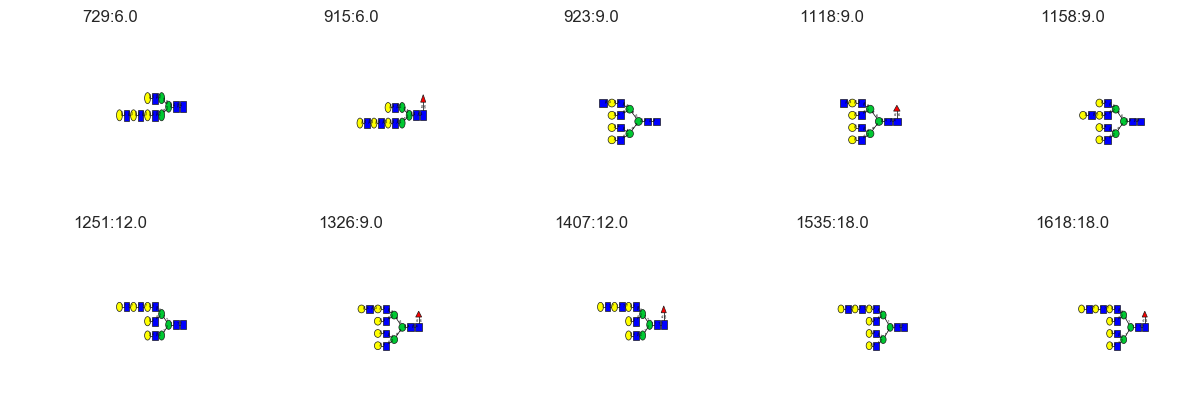

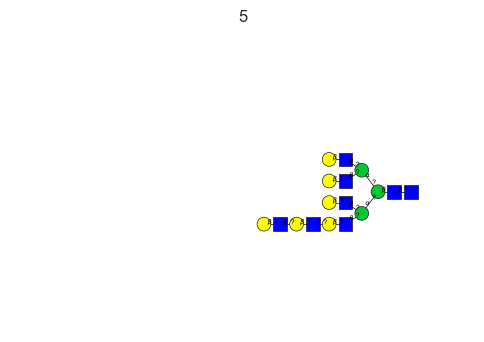

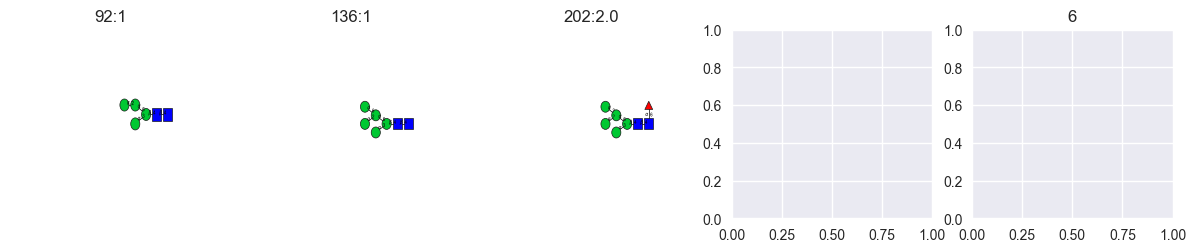

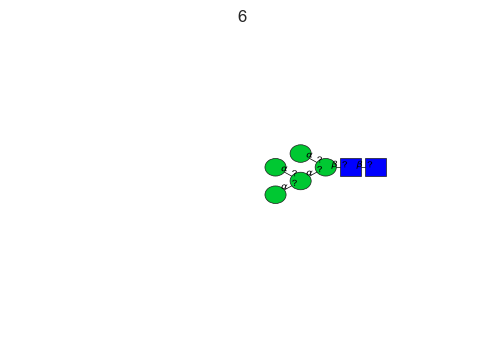

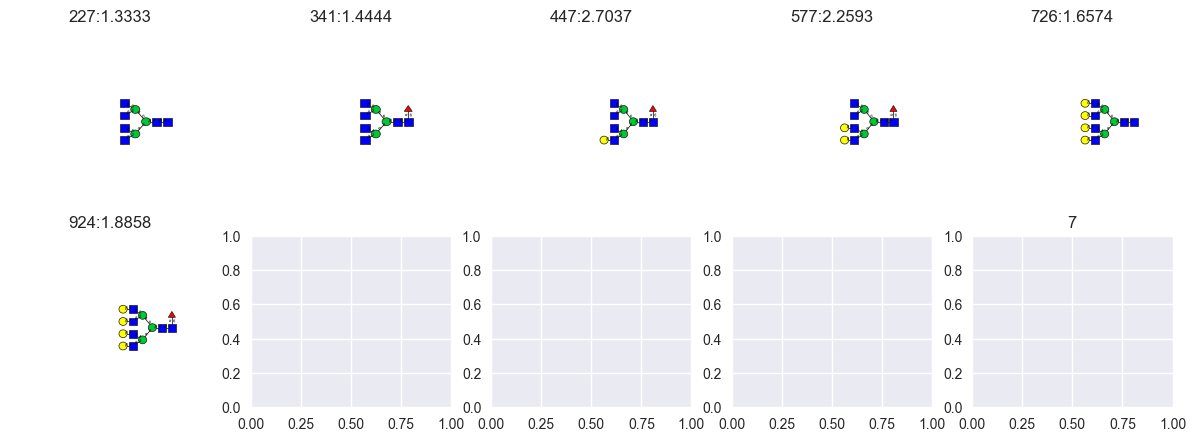

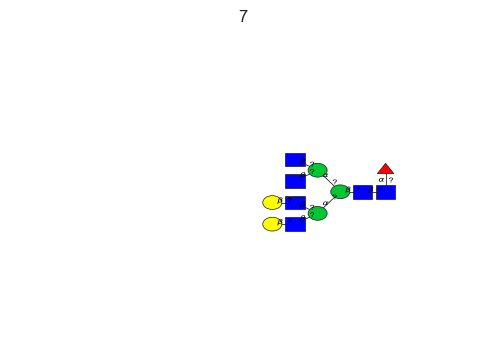

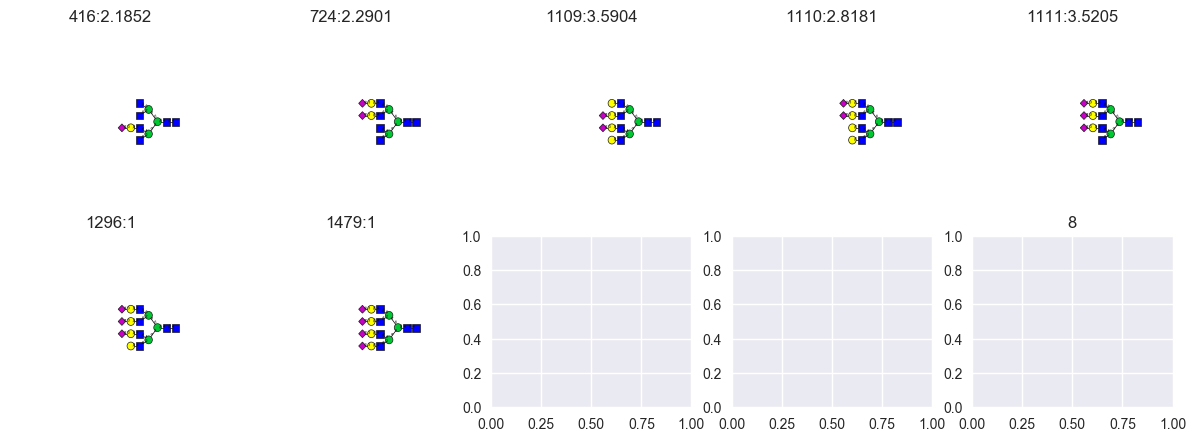

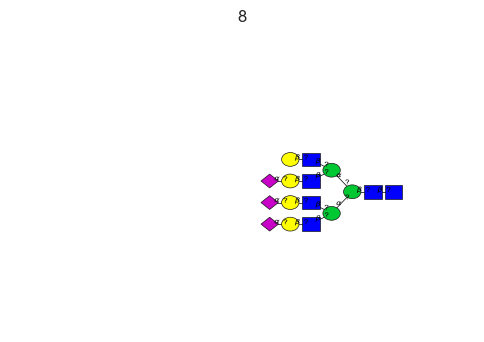

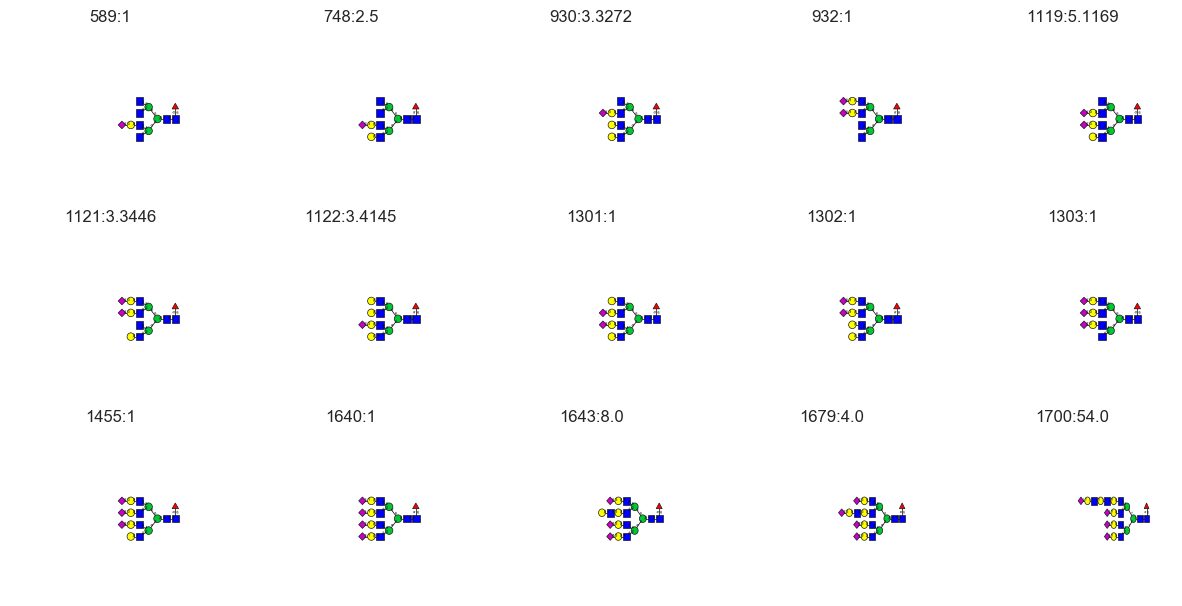

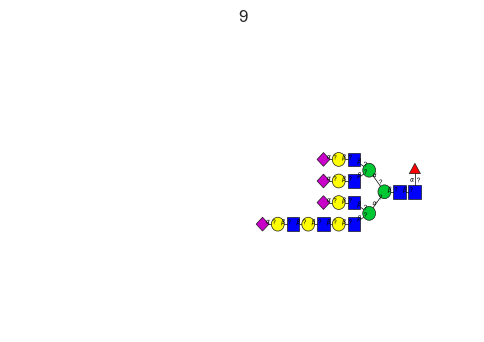

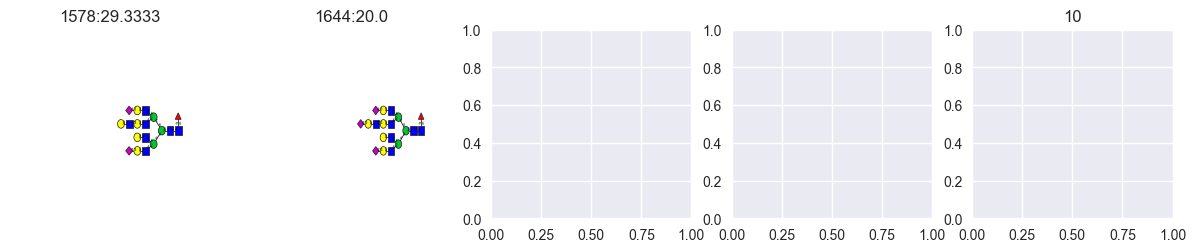

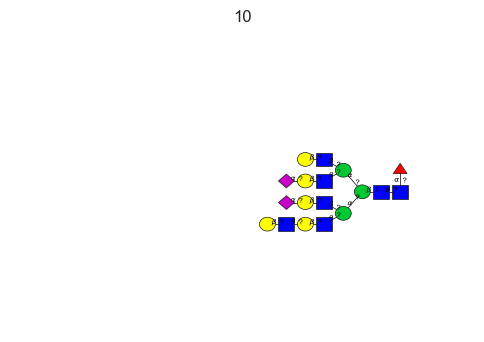

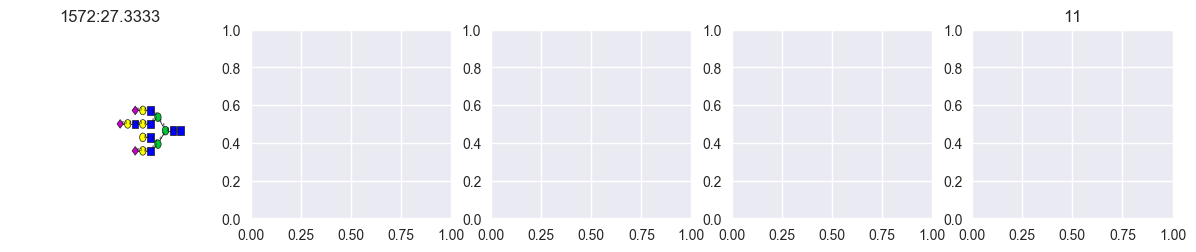

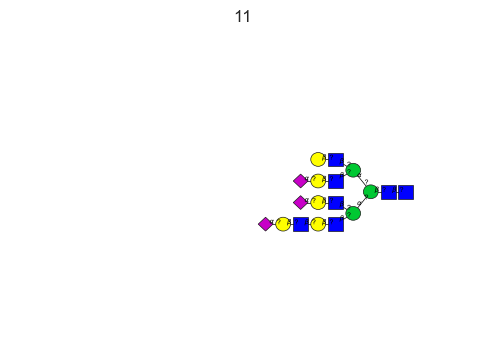

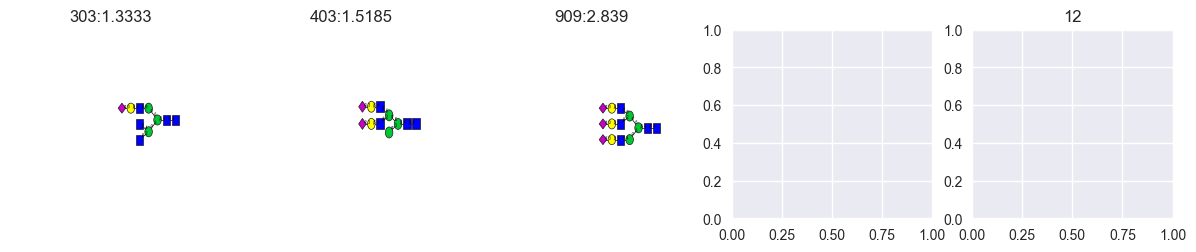

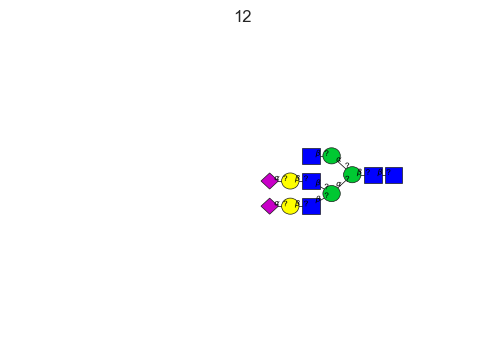

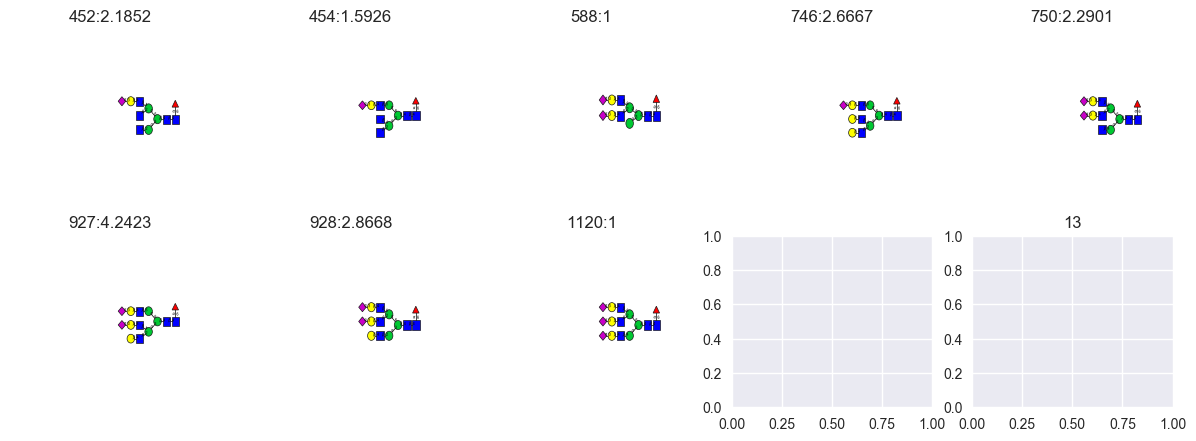

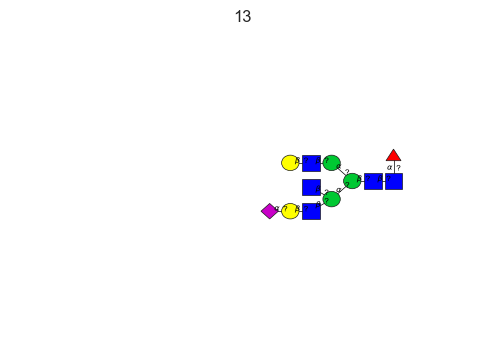

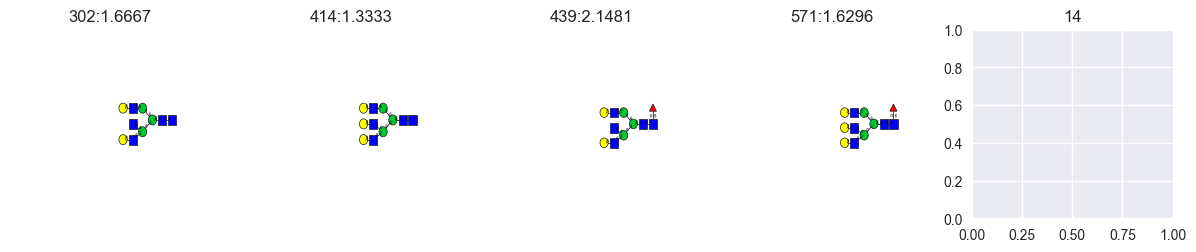

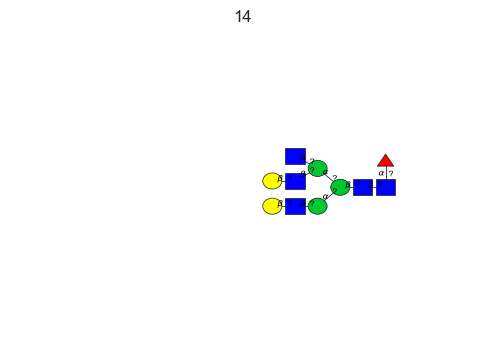

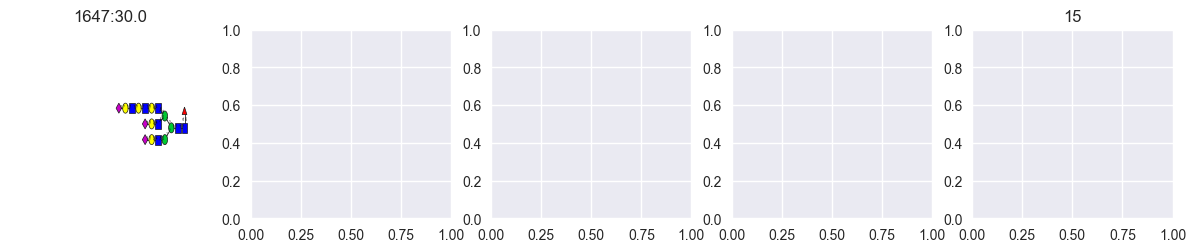

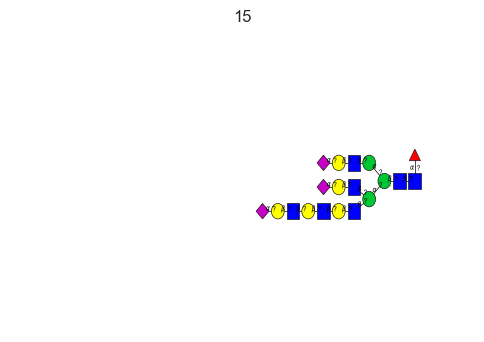

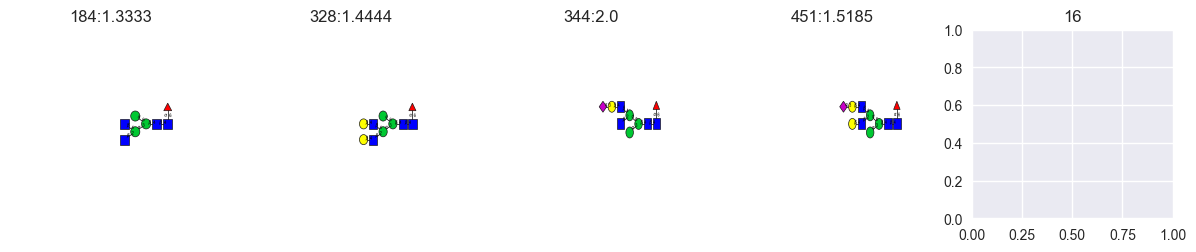

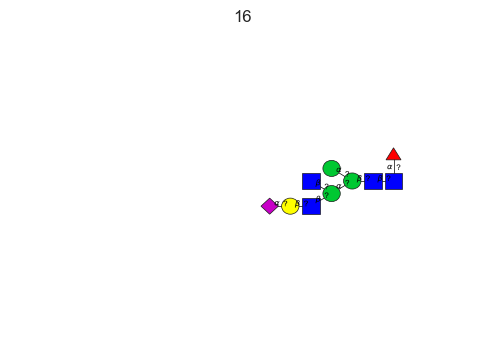

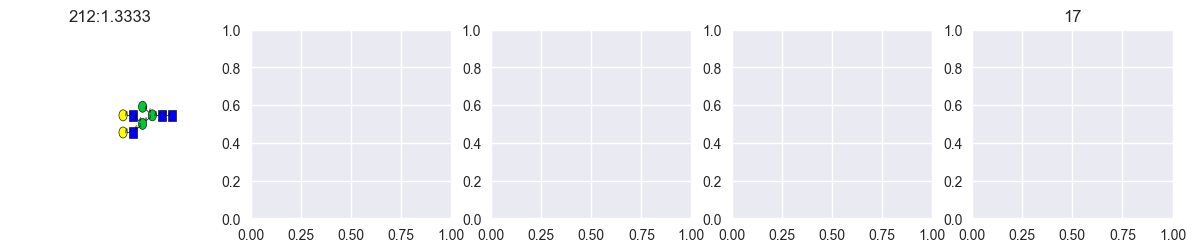

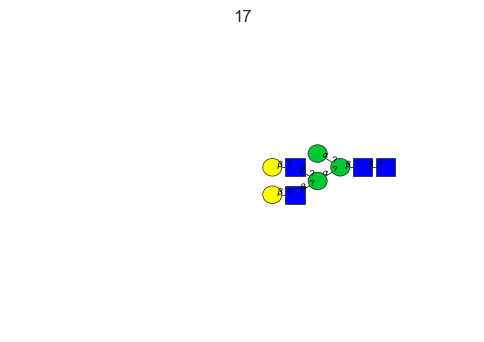

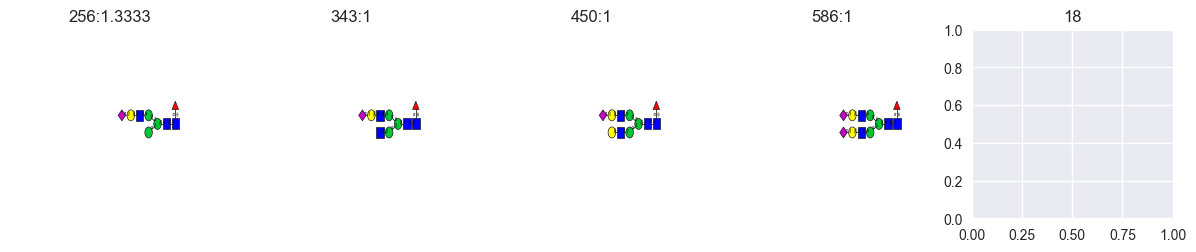

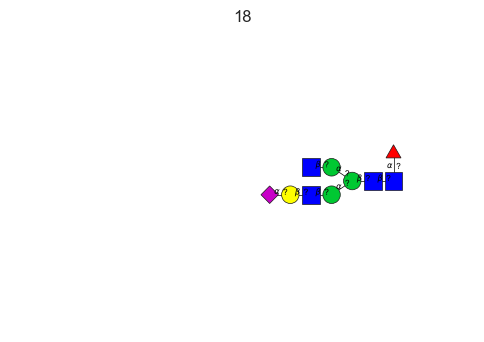

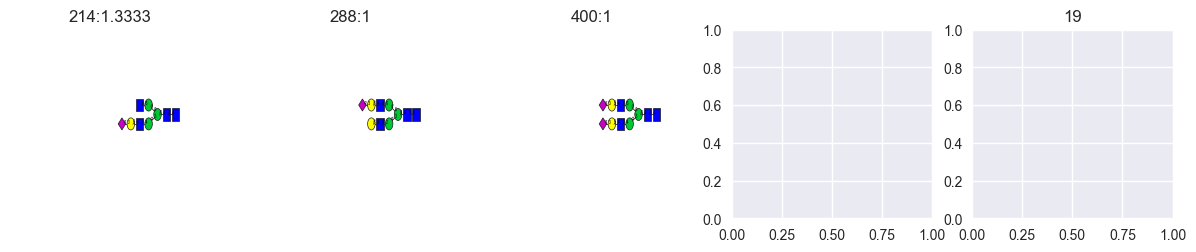

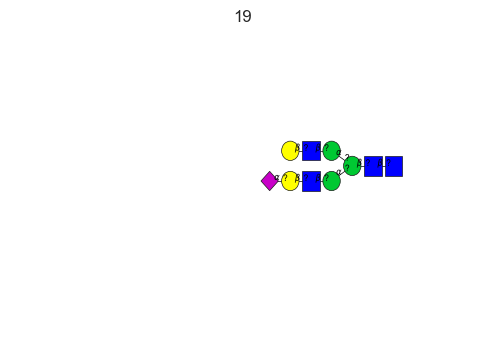

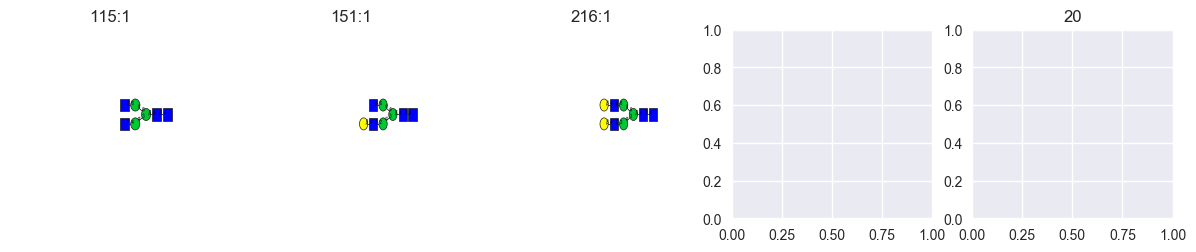

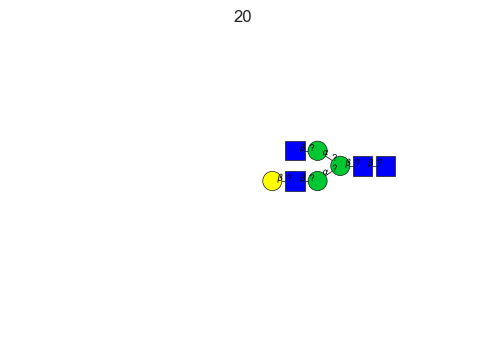

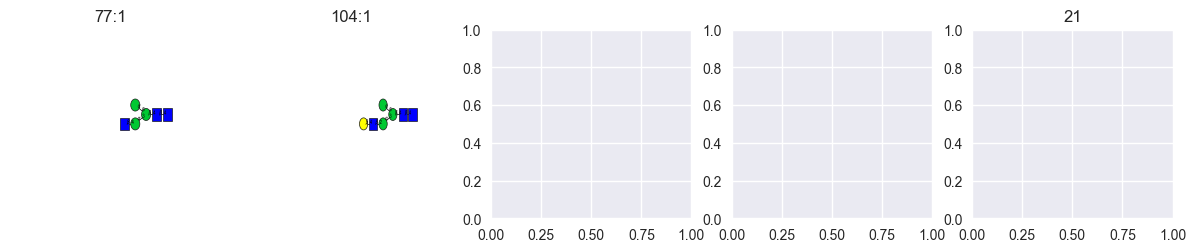

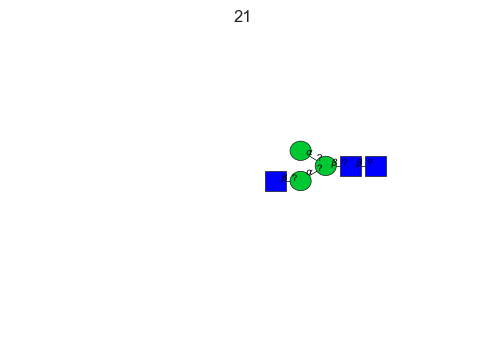

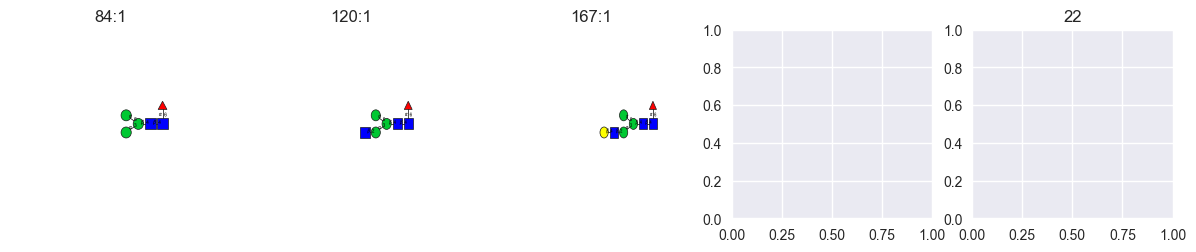

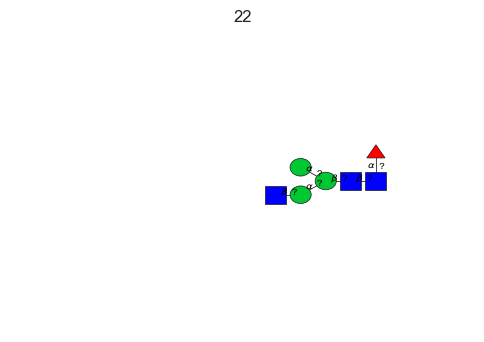

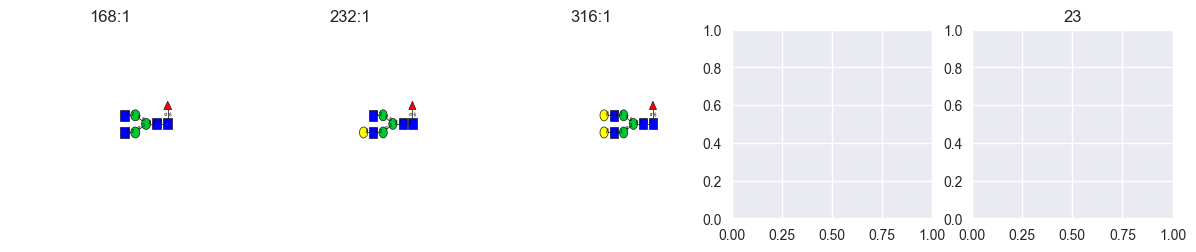

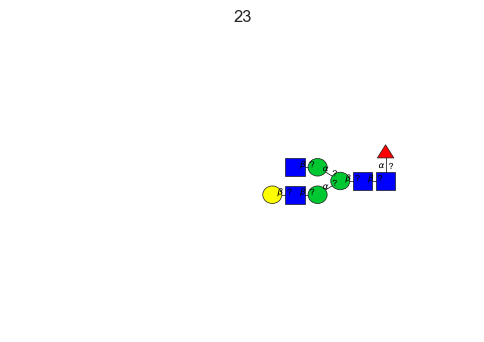

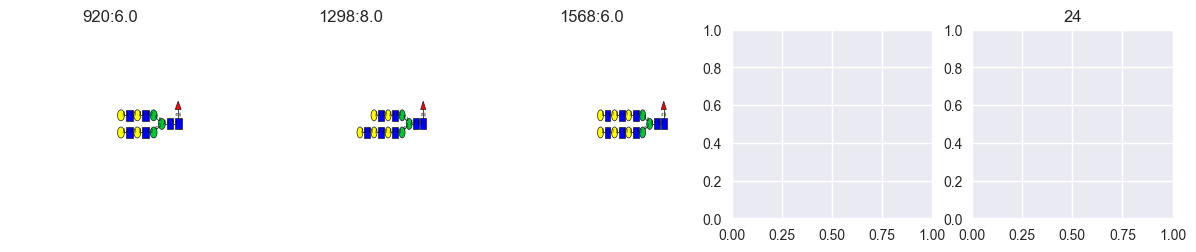

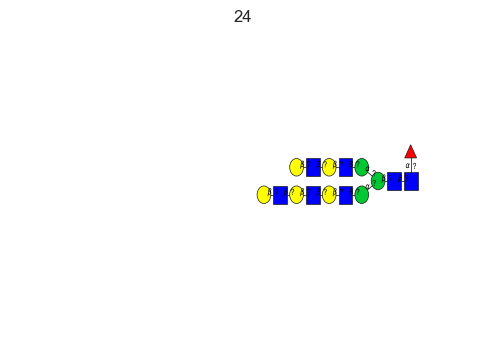

In [331]:
print(len(cccluster_dict))
# mannually reordered 

reload(clustering_analysis_pip)
reload(plot_glycan_utilities)

print(sum([len(cccluster_dict[i]) for i in cccluster_dict]))
clustering_analysis_pip.draw_glycan_cluster(cccluster_dict, name_prefix, motif_vec, merged_weights_dict)


In [ ]:
# rebuild the substructure table

In [363]:
__init__.aaa
reload(__init__)
_ = dict(zip(__init__.aaa_re, range(len(__init__.aaa_re))))
_name_r2py = dict(zip(__init__.aaa_re, __init__.aaa))
clust_table = pd.read_csv('/Users/apple/27_selected_profile/GMProfile.Cluster2.csv', header=0)
profile_dict={1:["EPO127.mgat1."],
2:["EPO174.mgat2."],
3:["EPO266.fut8."],
4:["KI_ST6GalNAc1.st3gal4.st3gal6.mgat4a.mgat4b.mgat5",
   "st3gal4.st3gal6.mgat4a.mgat4b.mgat5",
   "B3gnt2.mgat4a.mgat4b.mgat5",
   "mgat4A.mgat4B.mgat5",
   ],
5:["st3gal4.st3gal6"],
6:["mgat5",
   "mgat4A.mgat4B",
   "EPO78.mgat4B."],
7:["B4GalT1",
   "B4GalT2",
   "B4GalT3",
   "B4GalT4",
   "WT",]}
rearanged_list = [21,22,20,23,18,16,17,19,13,1,14,12,2,3,15,7,8,10,11,5,4,9,24,6]



profile_Gly=[]
profile_name_order = []
for i in range(1,len(profile_dict)+1):
    for j in profile_dict[i]:
        profile_Gly.append(_[j])
        profile_name_order.append(j)
def generate_weight(vec_, merged_weights_dict):
    weight_vec = [merged_weights_dict[i] for i in vec_]
    _sum =sum(weight_vec)
    return [i/_sum for i in weight_vec]


substructure_table = np.zeros((len(cccluster_dict),16))
for i in range(1,len(cccluster_dict)+1):
    temp_table =  deepcopy(df_ncore[profile_name_order][df_ncore.index.isin(cccluster_dict[i])])
    temp_table = np.array(temp_table)
    _weight_vec = generate_weight(sorted(cccluster_dict[i]),merged_weights_dict)
    _substructure_vec = np.zeros((1,16))
    for idex, j in enumerate(temp_table):
        _substructure_vec += j*_weight_vec[idex]
#     scaler = preprocessing.StandardScaler().fit(temp_table)
    substructure_table[i-1,] = _substructure_vec[0,]

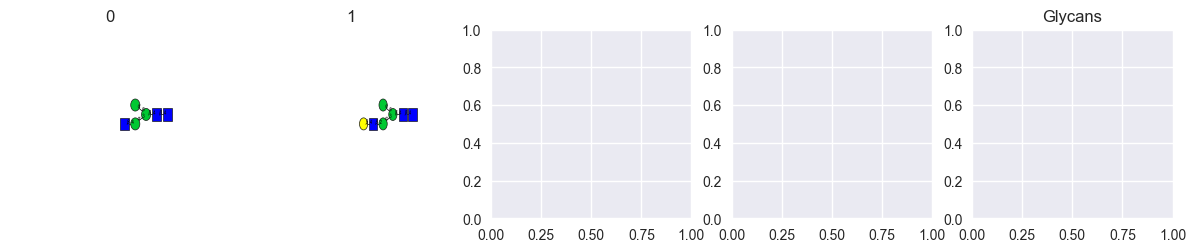

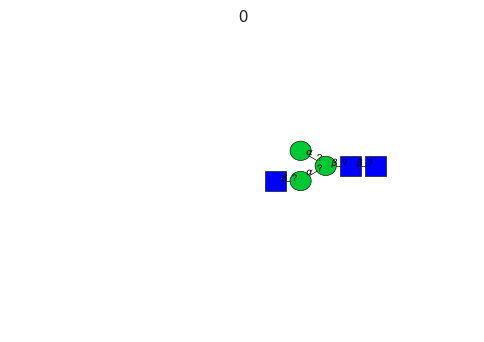

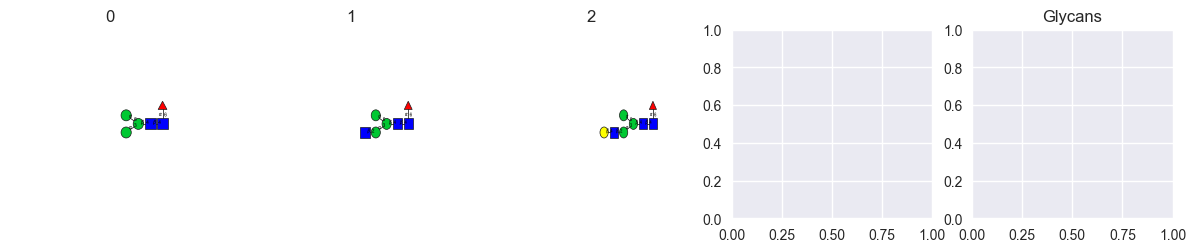

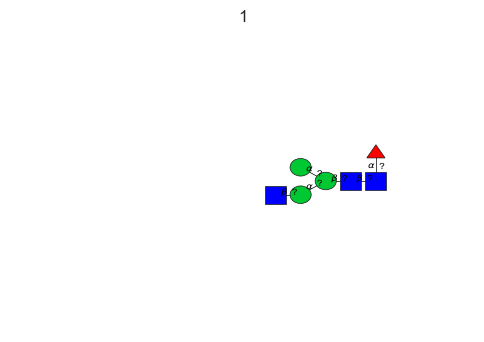

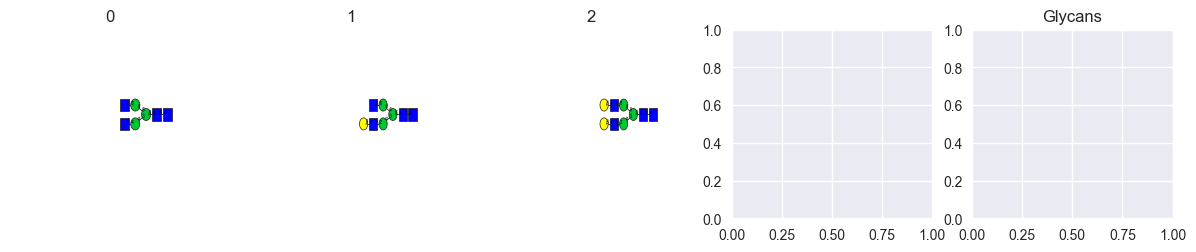

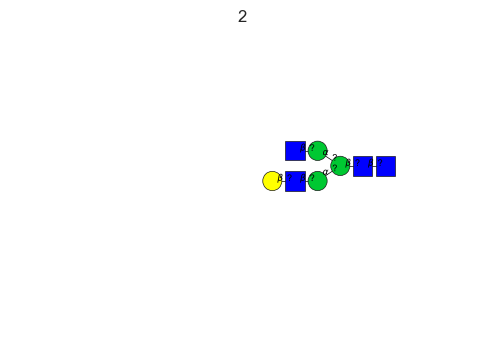

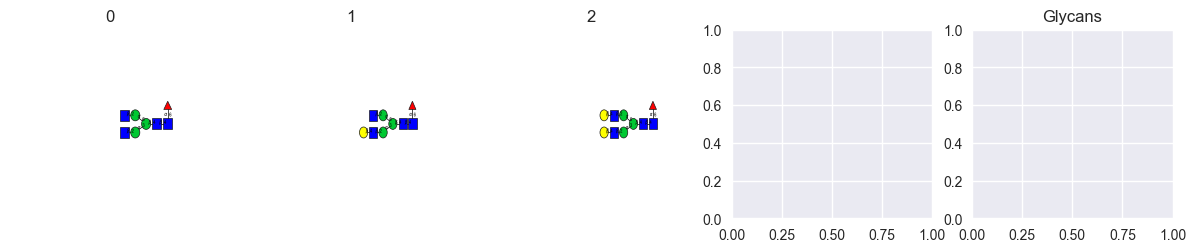

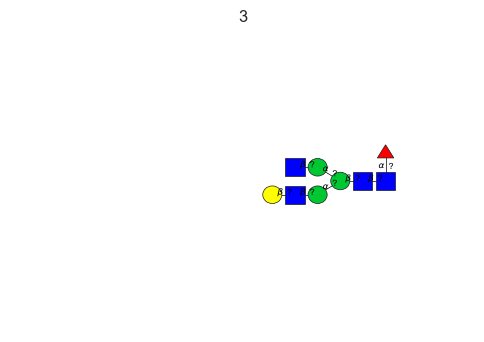

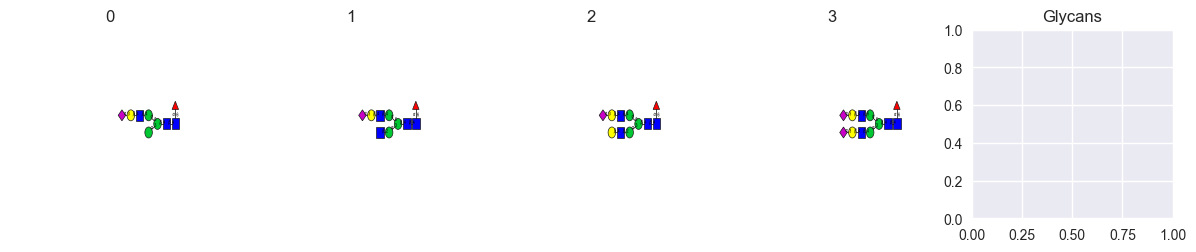

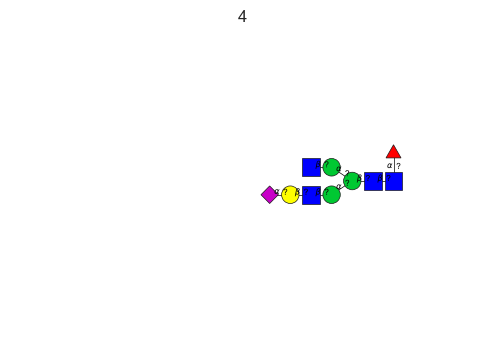

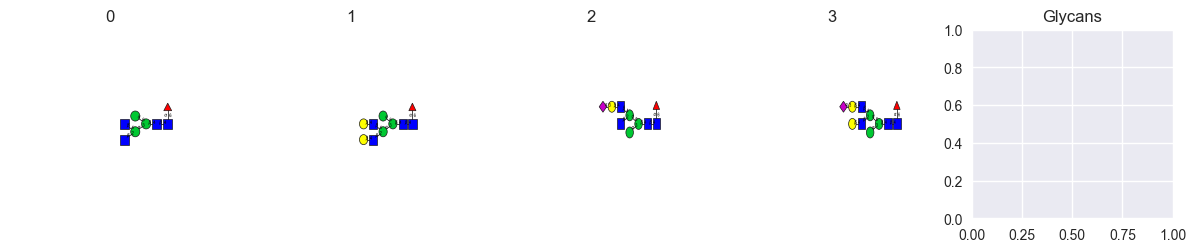

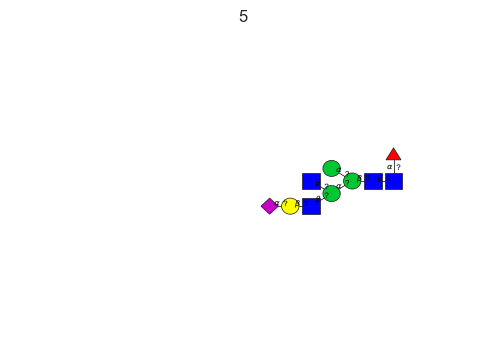

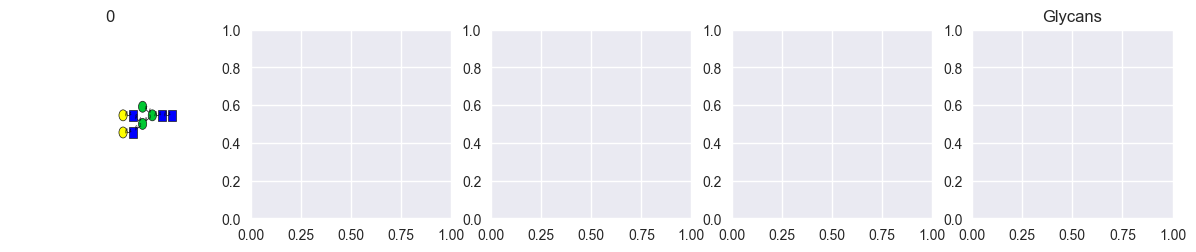

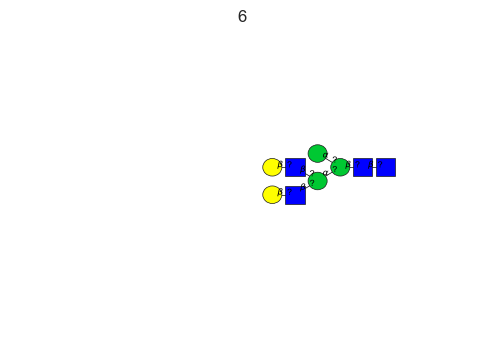

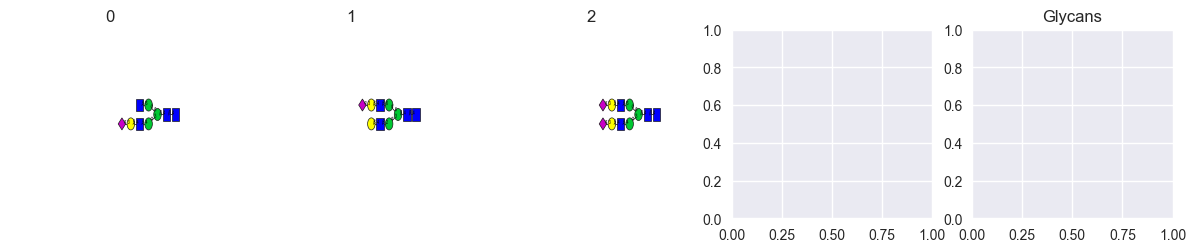

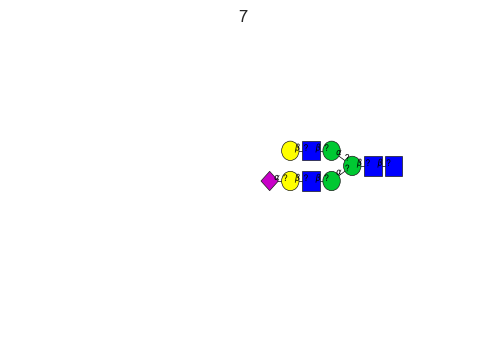

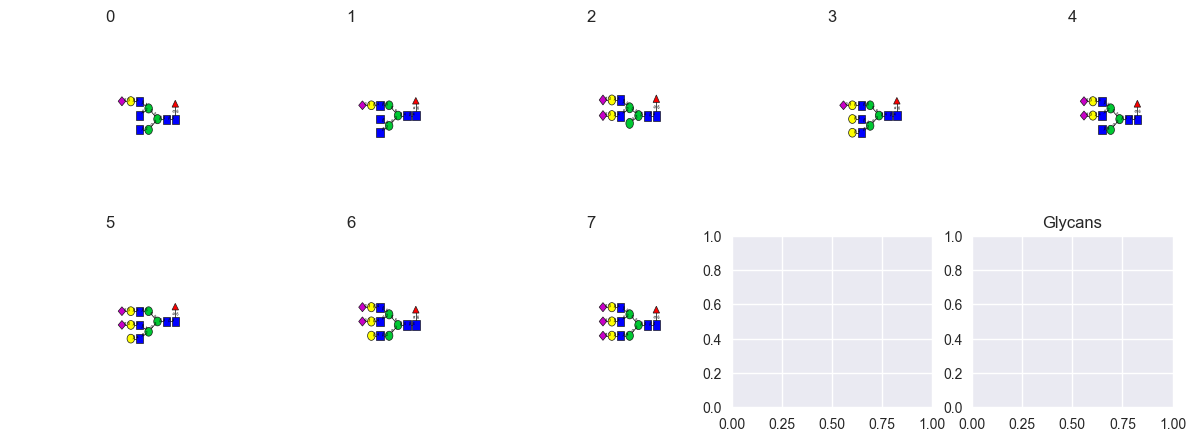

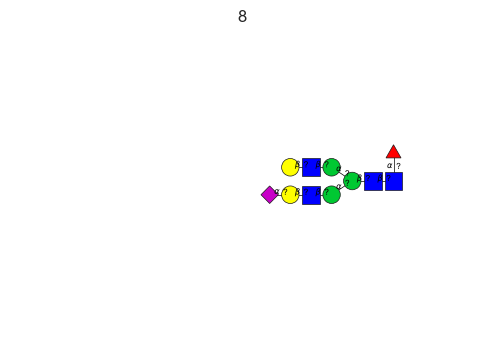

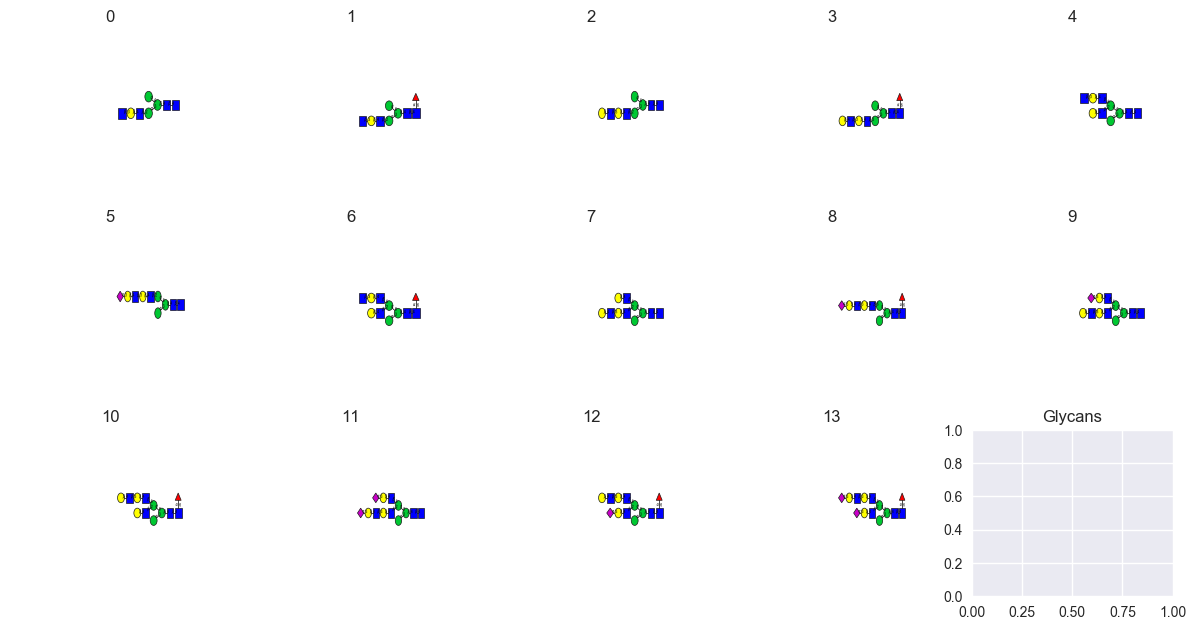

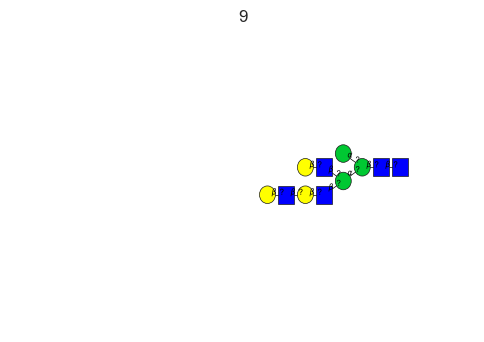

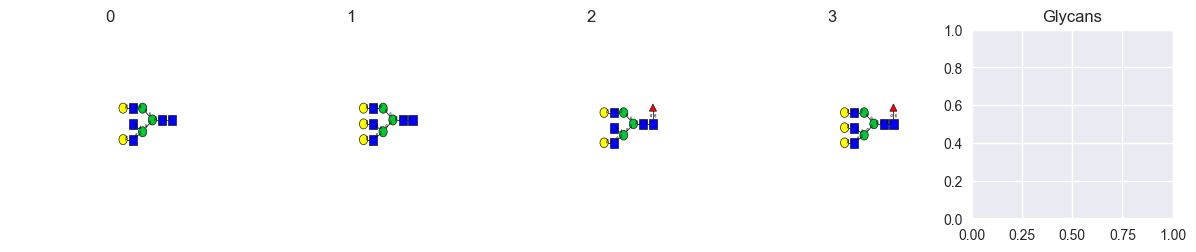

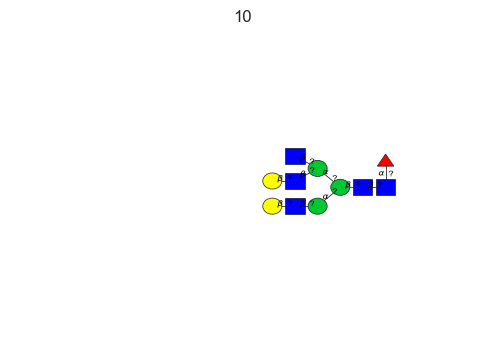

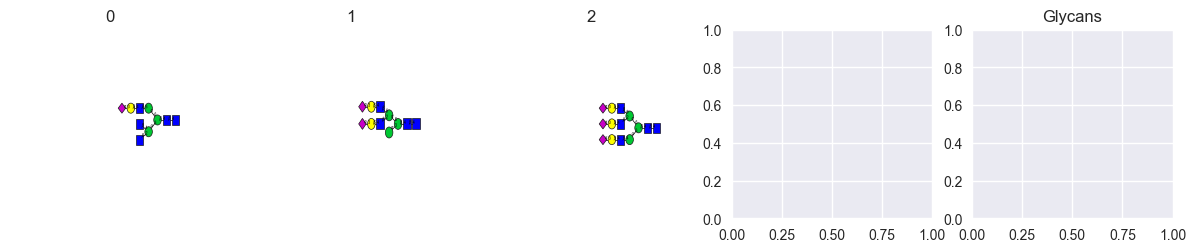

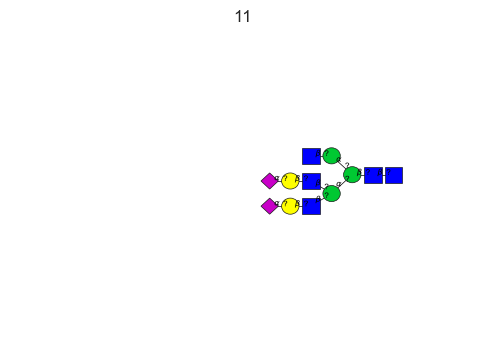

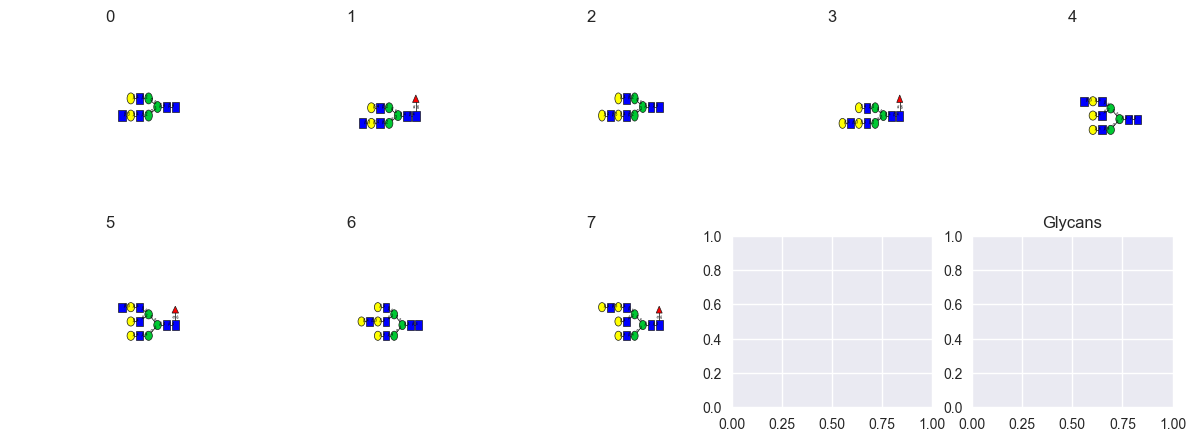

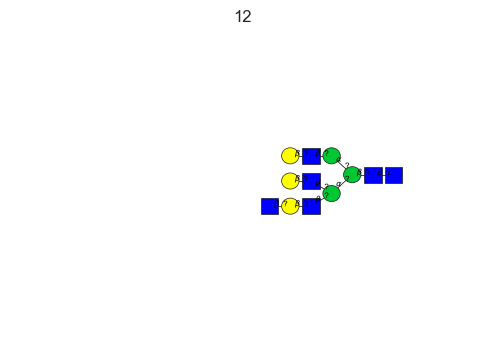

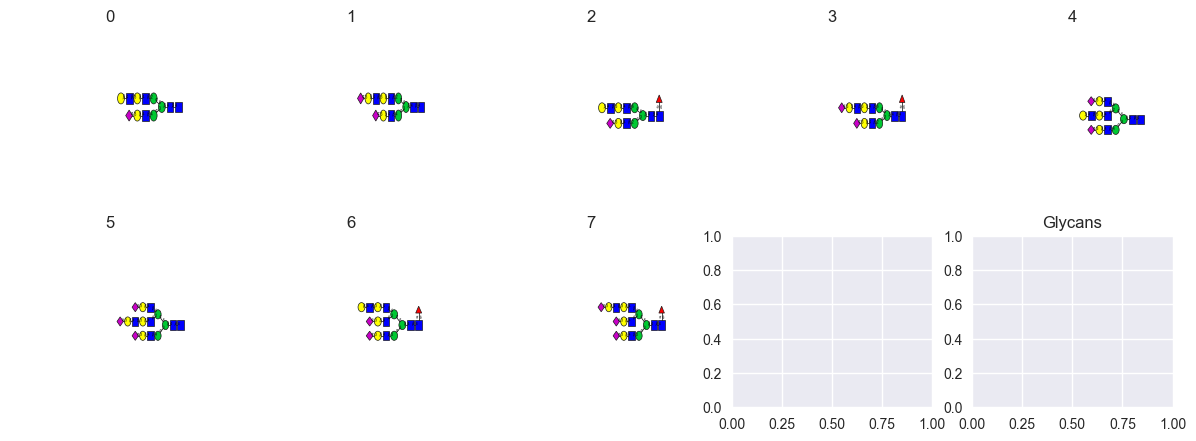

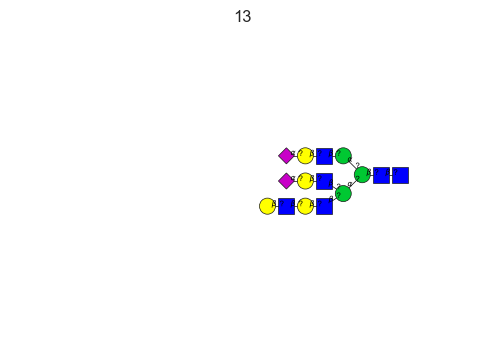

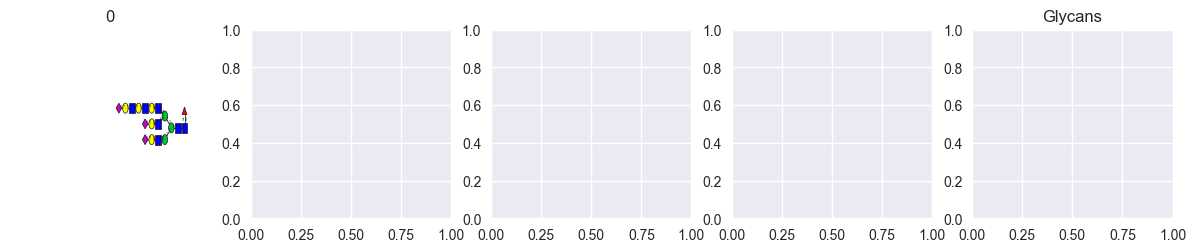

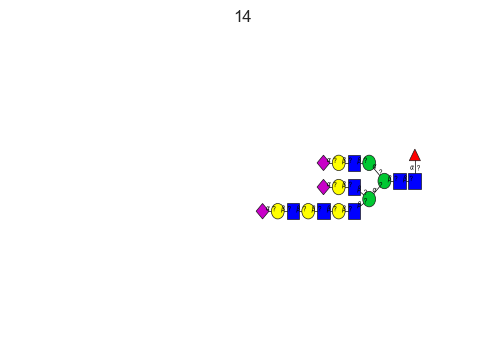

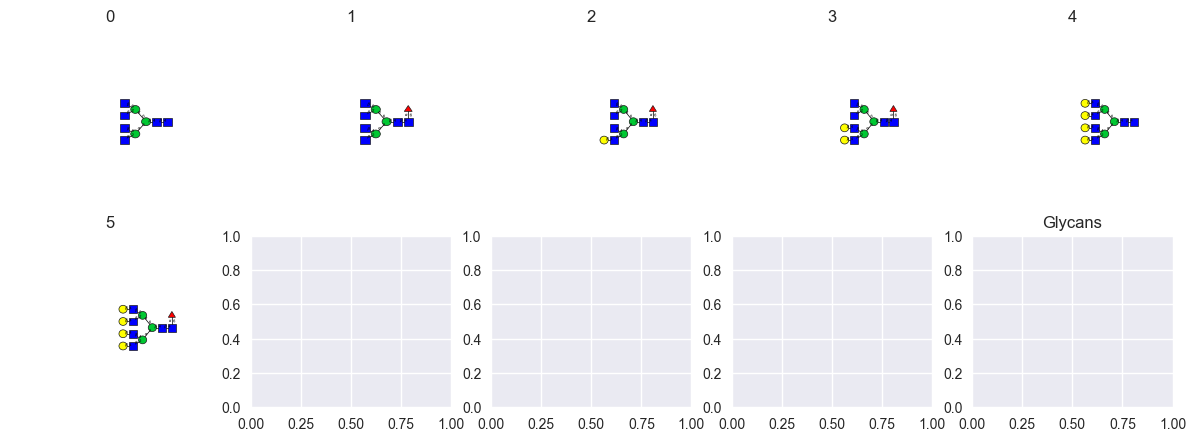

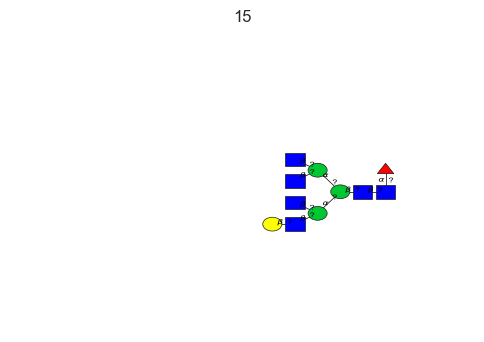

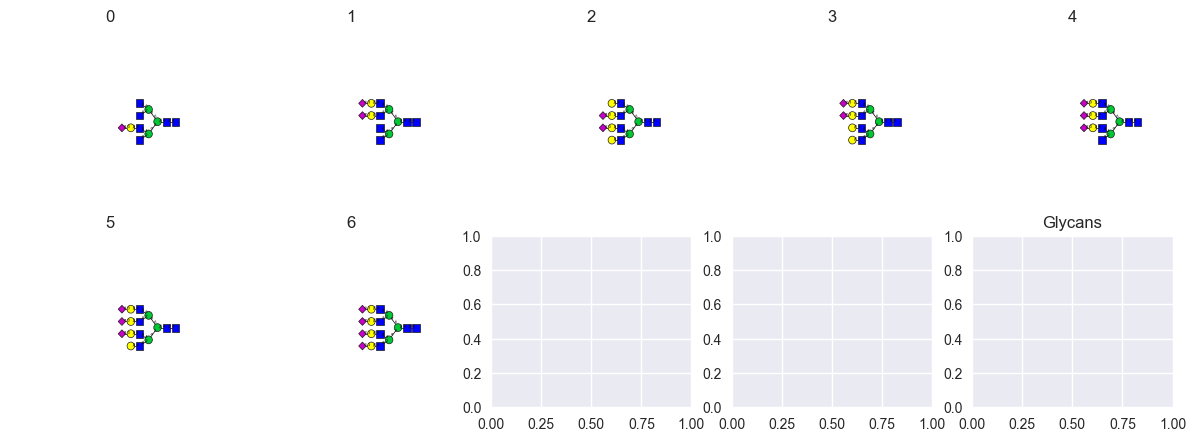

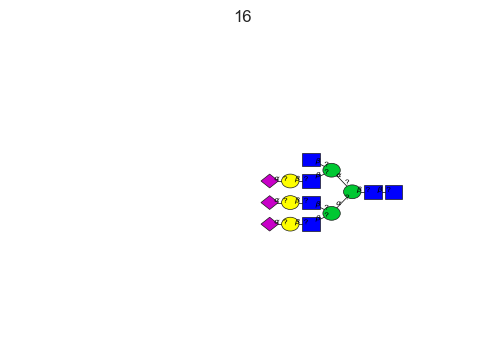

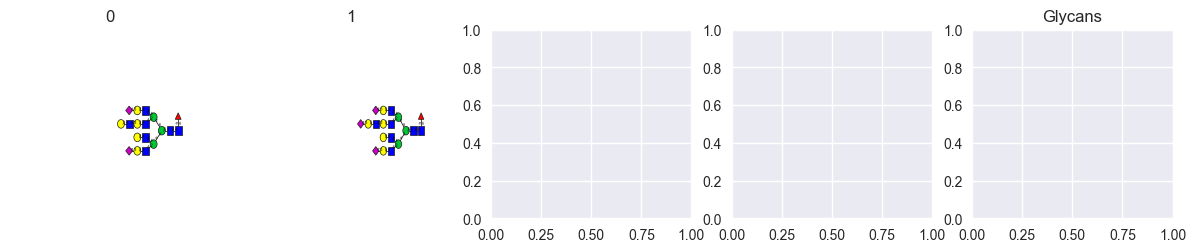

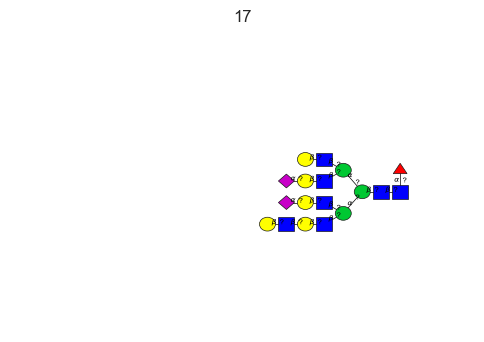

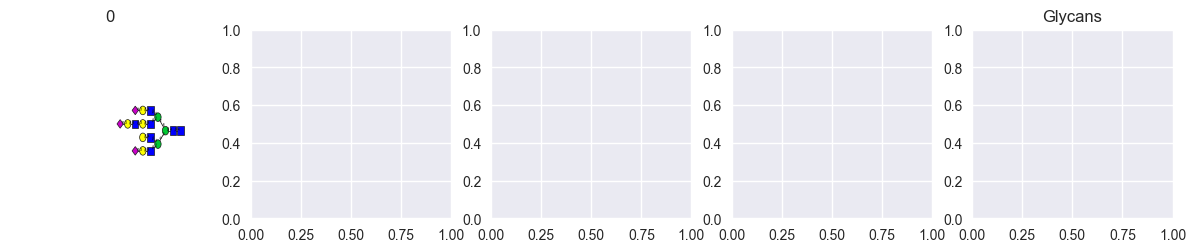

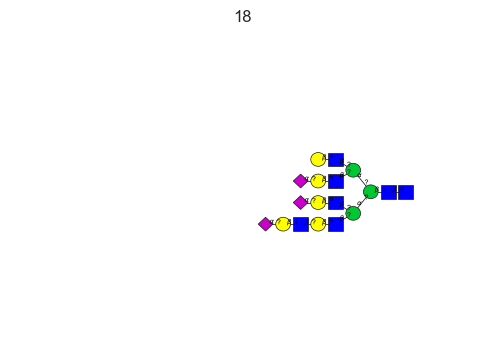

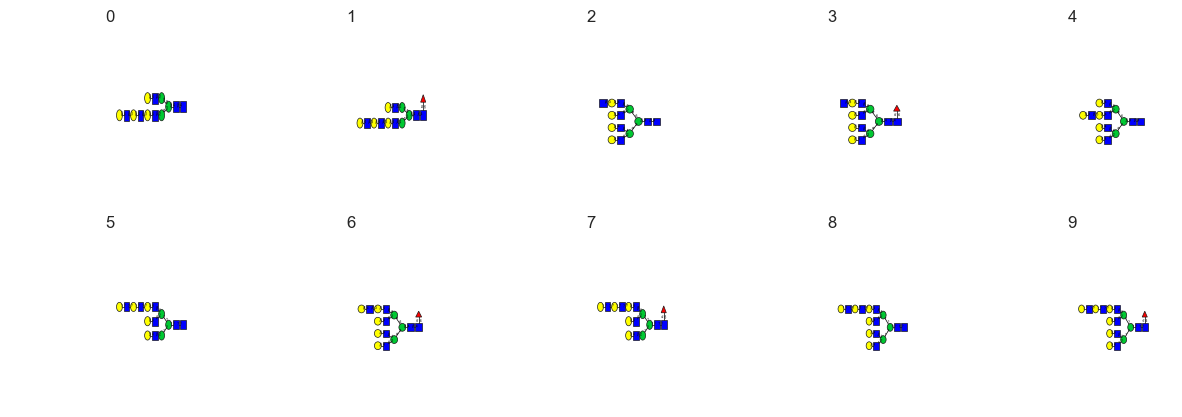

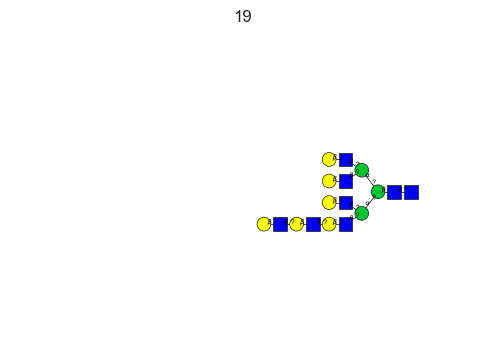

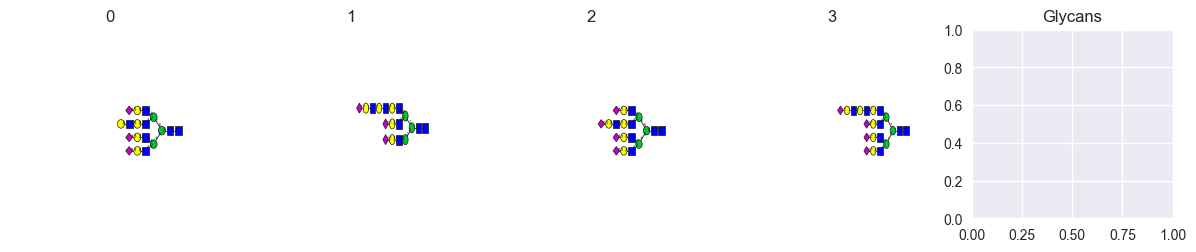

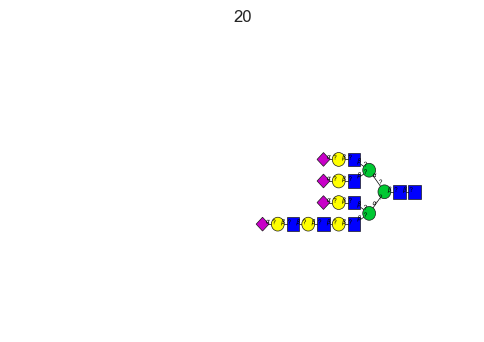

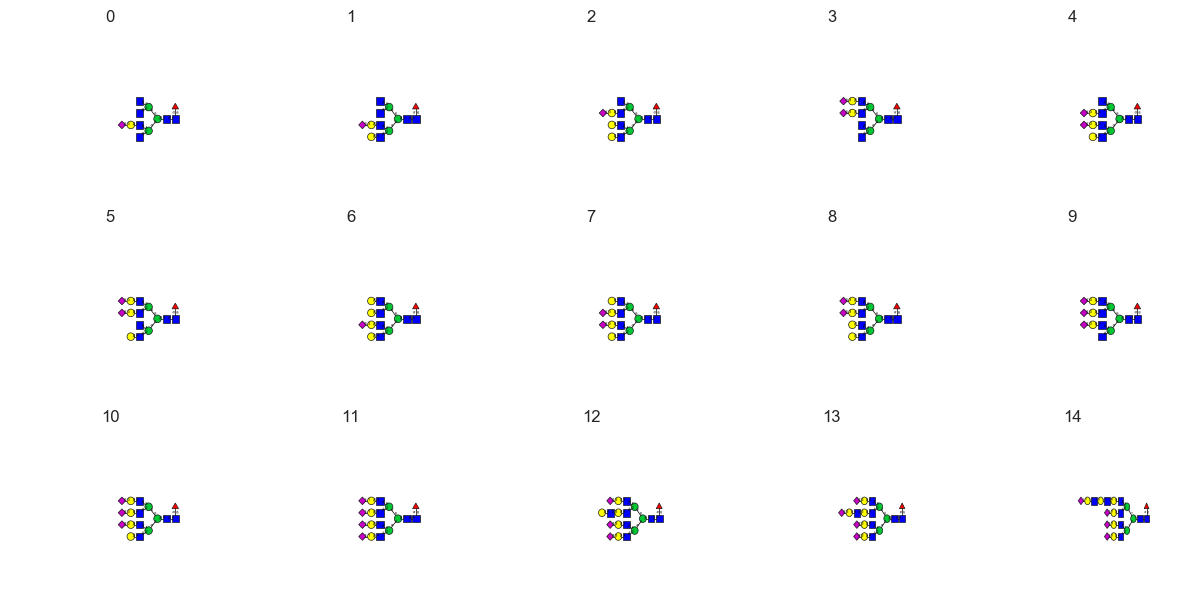

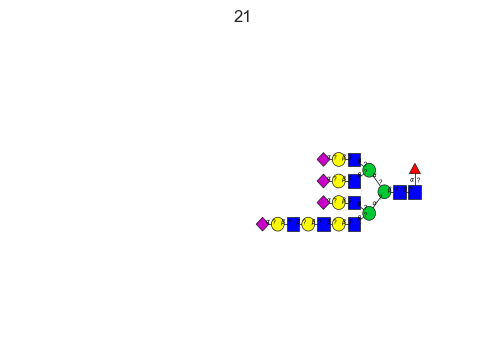

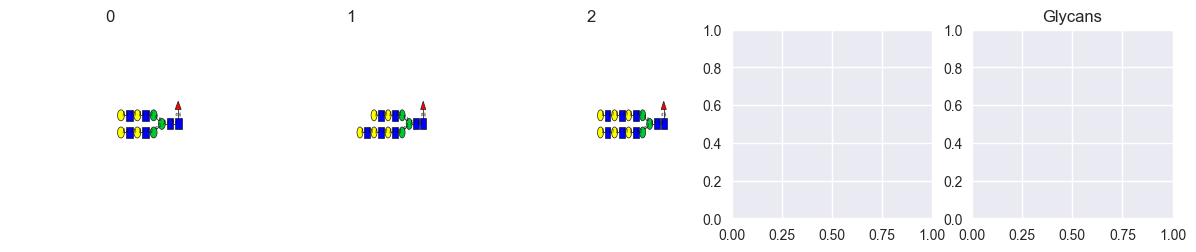

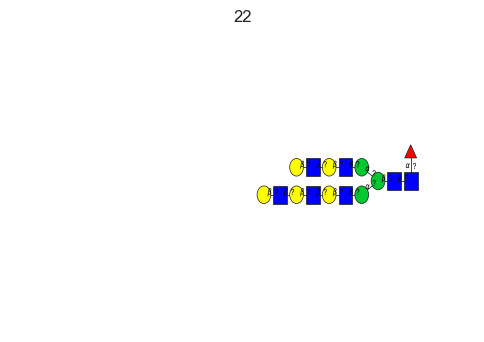

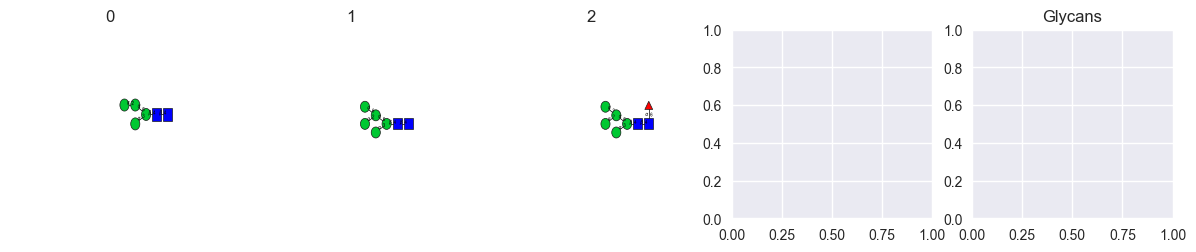

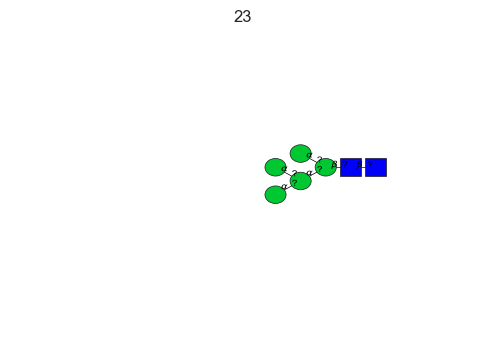

In [364]:
import nglycan_alignment
for idex,i in enumerate(rearanged_list):
    a_panel = nglycan_alignment.glycan_model()
    plot_glycan_utilities.plot_glycan_list([motif_vec[k] for k in cccluster_dict[i]])
    for j in cccluster_dict[i]:        
        gly_nglycan_dict = nglycan_alignment.traves_glycan(motif_vec[j], weight=merged_weights_dict[j])
        a_panel.glycan_walk(gly_nglycan_dict)
        # plot_glycan_utilities.plot_glycan(a_panel.get_common_representative(0.1), title=0.1)
    glycan_list = a_panel.get_reps(threshold_list=[0.55])
    plot_glycan_utilities.plot_glycan(glycan_list[0], title=str(idex))

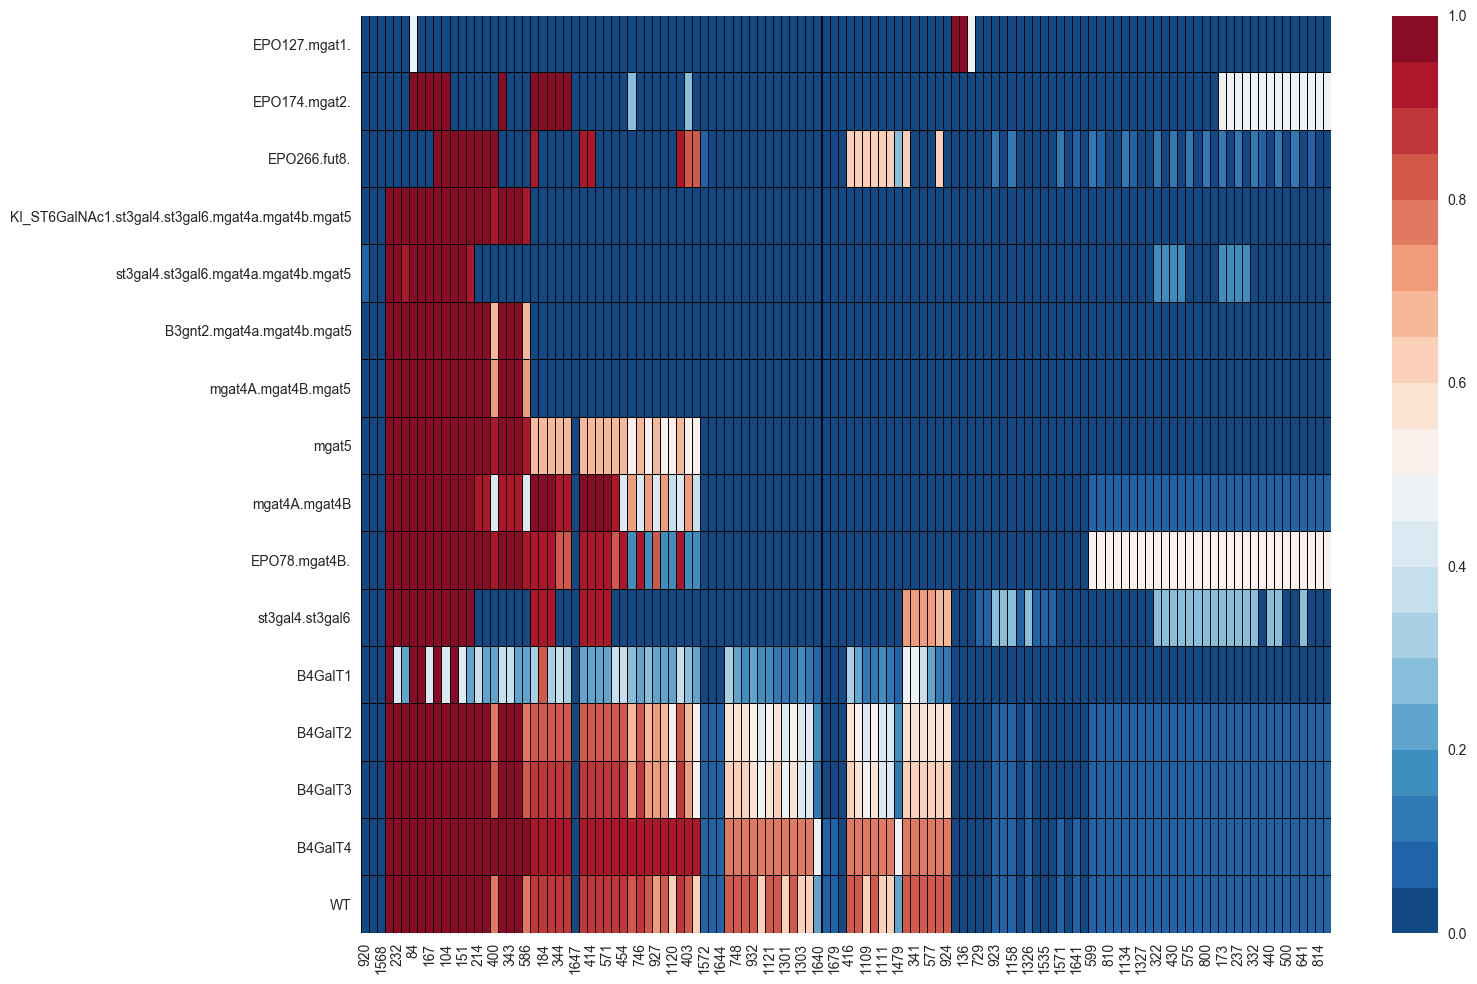

In [390]:
# df_ncore[profile_name_order][df_ncore.index.isin(cccluster_dict[i])]
reorder_glycoprofile_table = np.zeros(df_ncore.shape)
_cur_row = 0
_index = []
for i in sorted(list(cccluster_dict), reverse=True):
    temp_table =  deepcopy(df_ncore[profile_name_order][df_ncore.index.isin(cccluster_dict[i])])
    _index.extend(cccluster_dict[i])
    temp_table = np.array(temp_table)
#     _weight_vec = generate_weight(sorted(cccluster_dict[i]),merged_weights_dict)
    for j in range(temp_table.shape[0]):
        reorder_glycoprofile_table[_cur_row]=temp_table[j]
        _cur_row+=1
#     _substructure_vec = np.zeros((1,16))
#     for idex, j in enumerate(temp_table):
#         _substructure_vec += j*_weight_vec[idex]
# #     scaler = preprocessing.StandardScaler().fit(temp_table)
#     substructure_table[i-1,] = _substructure_vec[0,]
cluster_table_redraw = pd.DataFrame(data=reorder_glycoprofile_table, index=_index, columns=profile_name_order).transpose()
# cluster_table_redraw
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(cluster_table_redraw.round(2), ax=ax, annot=False, cmap=sns.color_palette("RdBu_r", 20), linewidths=.01, linecolor='black')
plt.tight_layout()
plt.savefig(__init__.plot_output_address+'raw_abundance_glycoprofile_redraw.eps')


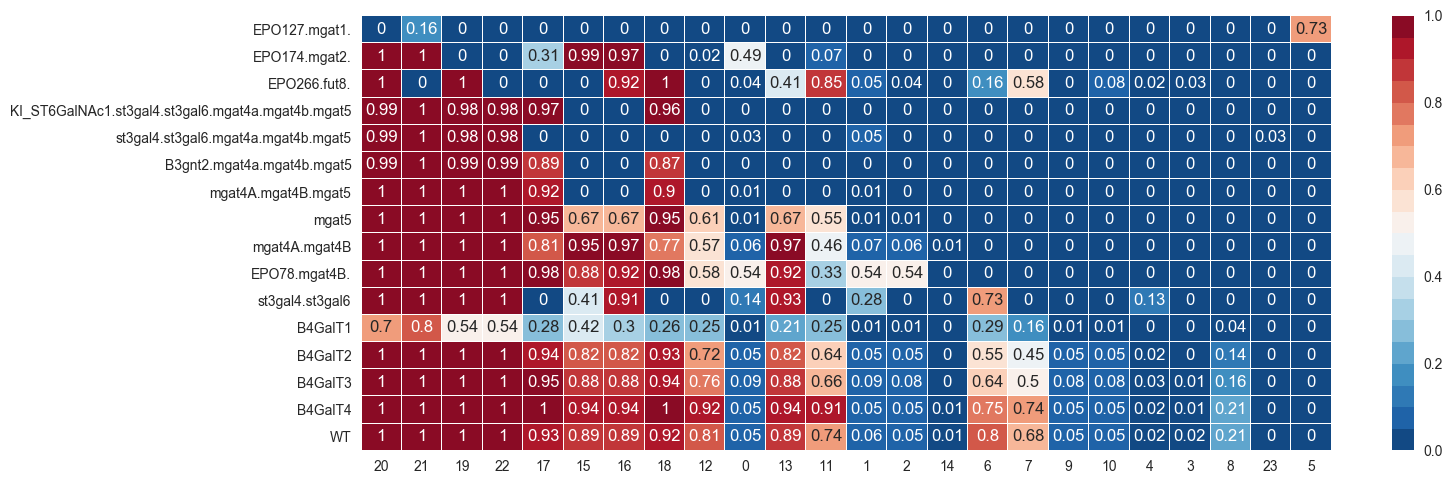

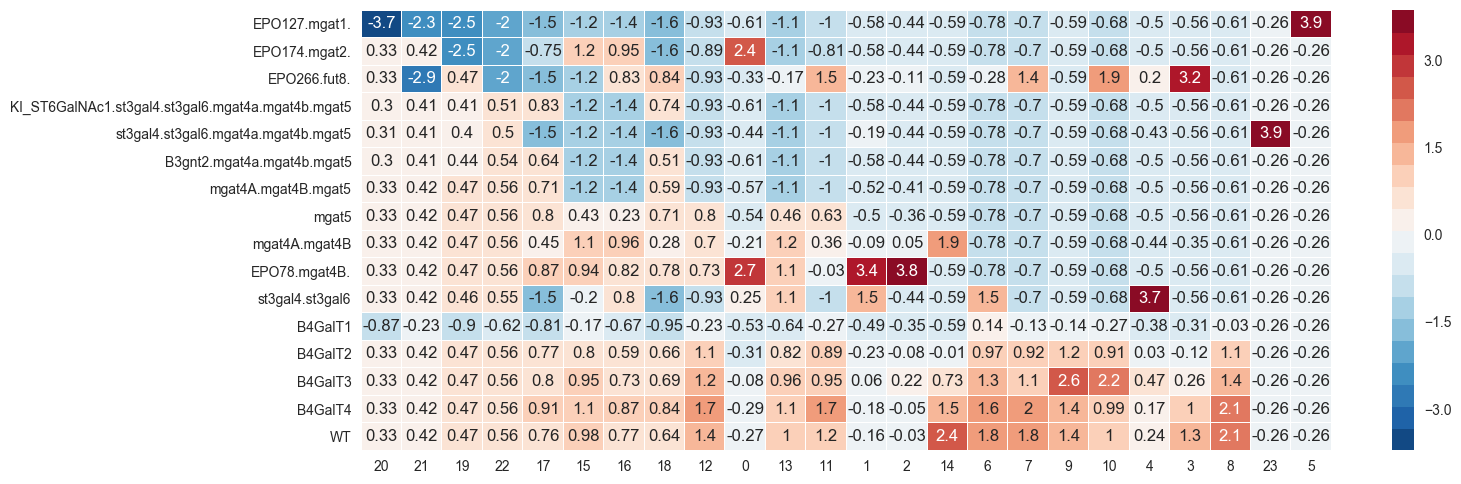

In [369]:
from scipy.stats import zscore

substre_profile=pd.DataFrame(data=substructure_table.transpose(), index=profile_name_order)
substre_profile=substre_profile[[i-1 for i in rearanged_list]]
fig, ax = plt.subplots(figsize=(16,5))

sns.heatmap(substre_profile.round(2), ax=ax, annot=True, cmap=sns.color_palette("RdBu_r", 20), linewidths=.01, linecolor='white')
plt.tight_layout()
plt.savefig(__init__.plot_output_address+'raw_abundance_sub_shifted.eps')
plt.show()

substre_profile_zscore=substre_profile.apply(zscore)
fig, ax = plt.subplots(figsize=(16, 5))
sns.heatmap(substre_profile_zscore.round(2), ax=ax, annot=True, cmap=sns.color_palette("RdBu_r", 20), linewidths=.01, linecolor='white')
plt.tight_layout()
plt.savefig(__init__.plot_output_address+'raw_abundance_zscore_shifted.eps')
plt.show()

In [347]:
import numpy as np
import matplotlib.pyplot as plt
#  matplotlib.rc('xtick', labelsize=20) 
# matplotlib.rc('ytick', labelsize=20)
def compare_profile(profile_table, name_list, ax, addr=None):
    # data to plot

    # create plot
    profile_table.columns=name_list
#     print('a', profile_table.shape)
#     print('a', profile_table)
#     for i in zip(range(profile_table.shape[0]),profile_table.iloc[:,0]):
#         print(i)
#     print(profile_table.iloc[0,0])
#     print('fini')
    index = np.arange(profile_table.shape[0])
    bar_width = min(0.25, 1/(profile_table.shape[1]+2))
    opacity = 0.8
    rects_list=[0]*profile_table.shape[1]
    if ax is None:
        fig, ax = plt.subplots(figsize=(8 ,3))
        ax.set_facecolor('white')
#         plt
        plt.xlabel('Substructure', size=20)
        plt.ylabel('Relative diff with zscore', size=20)
        plt.title('GlycoProfile Comparison', size=20)
        plt.xlabel('Substructure', size=20)
        plt.ylim(-5,5)
        
        for i,j in enumerate(profile_table.columns):
            plt.bar(index+i*bar_width, profile_table[j], bar_width,
    #                  alpha=opacity,
    #                  color='b',
                     label=str(j))
        plt.legend(name_list, loc=1)
        plt.yticks(size=15)
        plt.axhline(y=0, color='Black', linestyle='-',linewidth=0.1)
        plt.yticks([-4,-2,0,2,4], ['-4','-2','0','2','4'])
        plt.xticks(index-1/(profile_table.shape[1]+2), ([str(x) for x in range(1, profile_table.shape[0]+1)]))
        plt.savefig(addr)
        plt.tight_layout()
    else:
#         print(name_list)
        print('index', index)
        ax.set_facecolor('white')
        ax.set_ylim(-5,5)
#     ax.set_yticklabels(size=15)
        
    
        for i,j in enumerate(profile_table.columns):
            ax.bar(index+i*bar_width, profile_table[j], bar_width,
    #                  alpha=opacity,
    #                  color='b',
                     label=str(j))
        ax.legend(name_list, loc=2)
        ax.set_yticks([-4,-2,0,2,4])
        ax.axhline(y=0, color='Black', linestyle='-',linewidth=0.5)
        ax.set_yticklabels(['-4','-2','0','2','4'])
        ax.set_xticks(index-1/(profile_table.shape[1]+2), )
        ax.set_xticklabels(([str(x) for x in range(1, profile_table.shape[0]+1)]))
    if addr:
        
#     ax.tight_layout()
        plt.savefig(addr)
# compare_profile(substre_profile[])

# Add final name

In [348]:
profile_name_pub={1: ['EPO127.KO_mgat1'],
 2: ['EPO174.KO_mgat2'],
 3: ['EPO266.KO_fut8'],
 4: ['KO_st3gal4/6_mgat4a/4b/5',
  'KO_mgat4A/4B/5_B3gnt2',
  'KO_mgat4A/4B/5',
  'KI_st6gal-I; KO_mgat4a/4b/5_st3gal4/6'],
 5: ['KO_mgat5', 'KO_mgat4A/4B', 'EPO78.KO_mgat4B'],
 6: ['KO_st3gal4/6'],
 7: ['KO_B4GalT1', 'KO_B4GalT2', 'KO_B4GalT3', 'KO_B4GalT4', 'WT']}



index [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
index [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


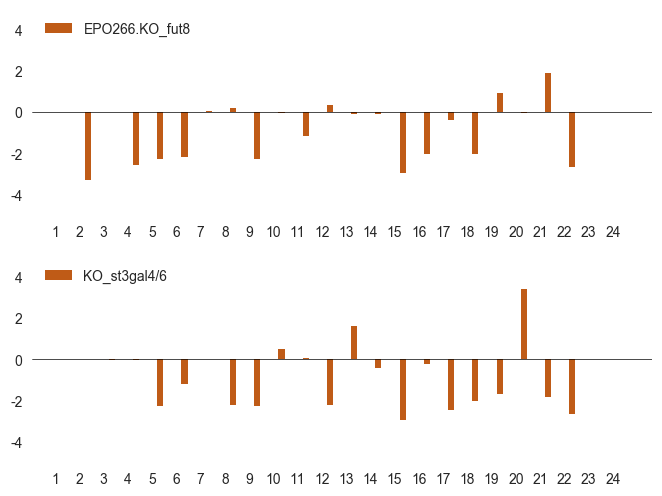

In [349]:

fig, axes = plt.subplots(2, 1, squeeze=False, facecolor='white')

# plt.title(title)
fig.set_size_inches(8, 6)
_count = 0
# _profile_dict={1:["EPO127.mgat1.", "EPO174.mgat2.", "EPO266.fut8.", "st3gal4.st3gal6"]
# _name_list = [x for x in mod_profile_dict[i]]
condense_plot = ["EPO266.fut8.", "st3gal4.st3gal6", ]
condense_plot_name = ['EPO266.KO_fut8','KO_st3gal4/6']
sns.set(palette='Accent_r')
if 'B4GalT2' in substre_profile_zscore.columns:
    pass
else:
    substre_profile_zscore = substre_profile_zscore.transpose()
substre_profile_zscore=substre_profile_zscore.round(3)
substre_profile_zscore_with_baseWT = substre_profile_zscore.copy()
base = list(substre_profile_zscore.WT.tolist())
for i in substre_profile_zscore_with_baseWT.columns:
#     print(base)
    substre_profile_zscore_with_baseWT[i]=substre_profile_zscore_with_baseWT[i]-base


for idex, i in enumerate(condense_plot):
    #             print(i)
    #             print(divmod(_count, _a))
    _name_list = [i]
    
#     _x, _y = divmod(_count, _len)
    ax=axes[idex][0]
    compare_profile(deepcopy(substre_profile_zscore_with_baseWT[_name_list]), [condense_plot_name[idex]], ax=ax)#addr=__init__.plot_output_address+"substructure_cluster_"+str(i)+".eps")
#     _count += 1
plt.savefig(__init__.plot_output_address+"substructure_cluster_condense.eps")

['EPO127.mgat1.']
['EPO174.mgat2.']
['EPO266.fut8.']
['st3gal4.st3gal6.mgat4a.mgat4b.mgat5', 'B3gnt2.mgat4a.mgat4b.mgat5', 'mgat4A.mgat4B.mgat5', 'KI_ST6GalNAc1.st3gal4.st3gal6.mgat4a.mgat4b.mgat5']
['mgat5', 'mgat4A.mgat4B', 'EPO78.mgat4B.']
['st3gal4.st3gal6']
['B4GalT1', 'B4GalT2', 'B4GalT3', 'B4GalT4', 'WT']


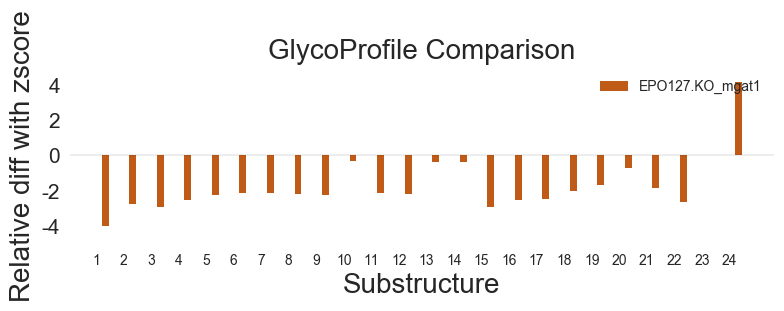

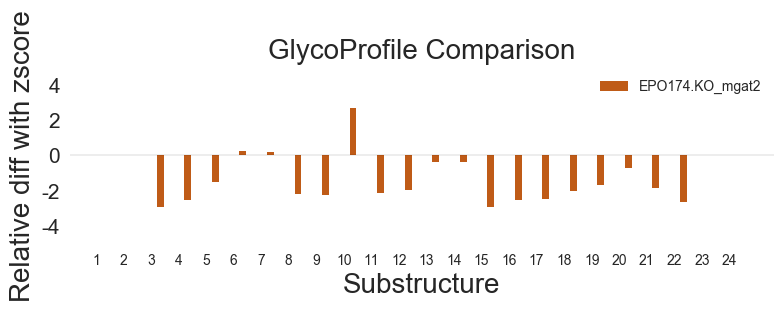

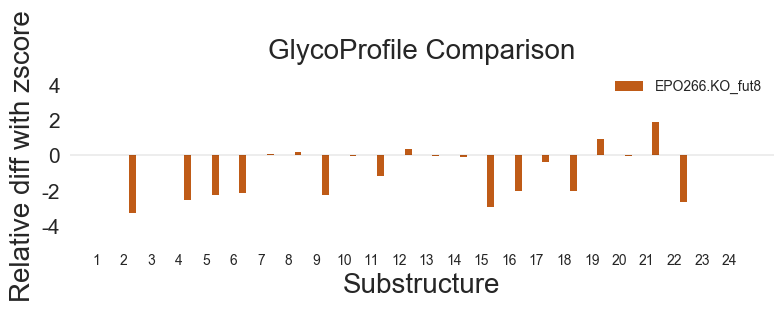

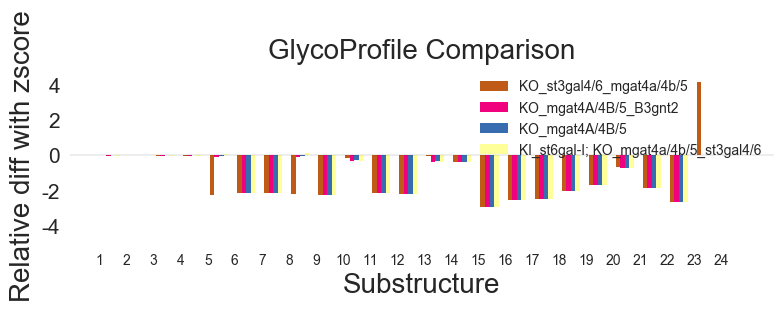

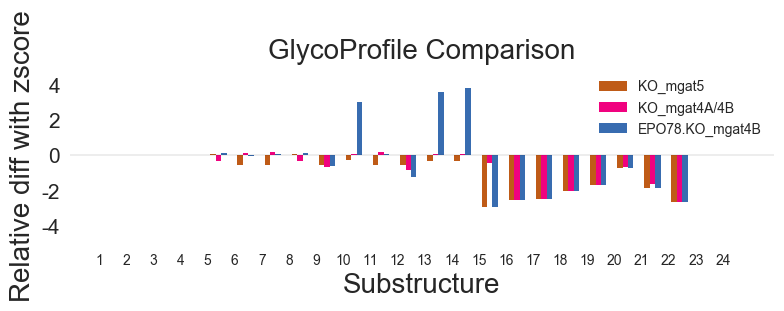

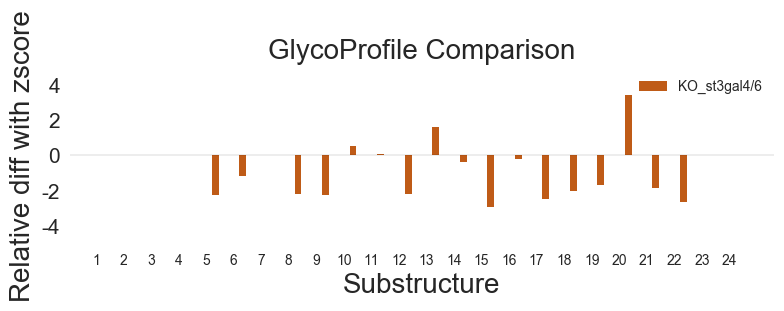

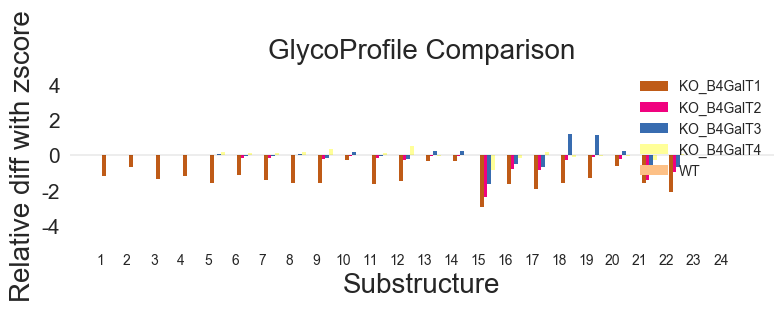

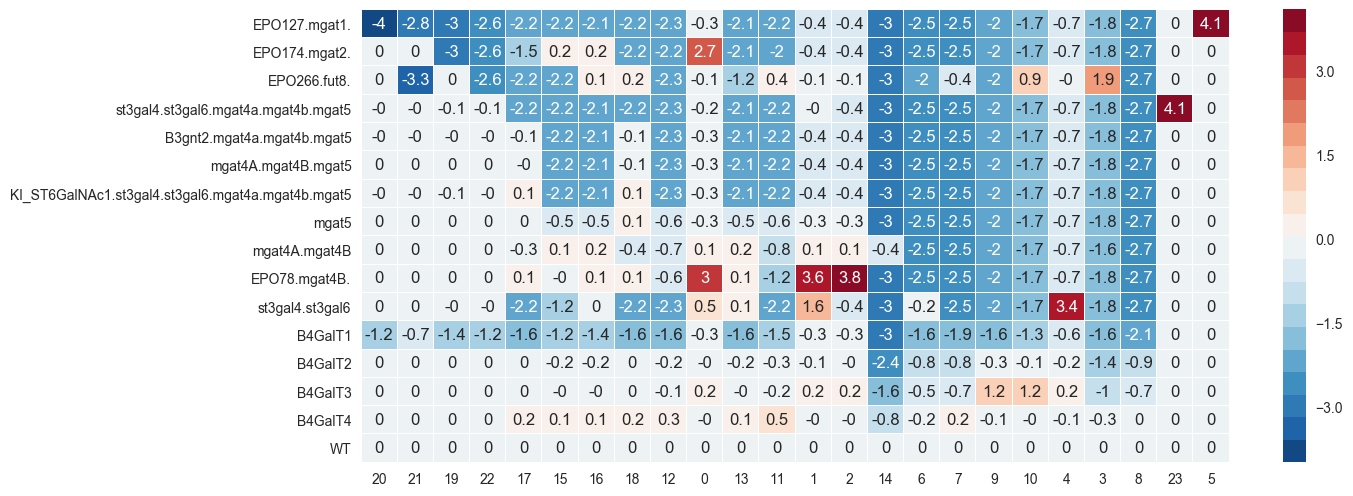

In [350]:

mod_profile_dict=profile_dict
sns.set(palette='Accent_r')
if 'B4GalT2' in substre_profile_zscore.columns:
    pass
else:
    substre_profile_zscore = substre_profile_zscore.transpose()
substre_profile_zscore=substre_profile_zscore.round(3)
substre_profile_zscore_with_baseWT = substre_profile_zscore.copy()
base = list(substre_profile_zscore.WT.tolist())
for i in substre_profile_zscore_with_baseWT.columns:
#     print(base)
    substre_profile_zscore_with_baseWT[i]=substre_profile_zscore_with_baseWT[i]-base
#     print(substre_profile_zscore_with_baseWT[i])
#     print(substre_profile_zscore_with_baseWT[i])
for i in sorted(mod_profile_dict):
#     for j in profile_dict[i]:
    _name_list = [x for x in mod_profile_dict[i]]
#     print(_name_list, len(_name_list))
    print(_name_list)
    compare_profile(deepcopy(substre_profile_zscore_with_baseWT[_name_list]), profile_name_pub[i], ax=None, addr=__init__.plot_output_address+"cluster_rep_abd_zscore"+str(i)+".eps")
    
substre_profile_zscore_with_baseWT=substre_profile_zscore_with_baseWT.transpose()
substre_profile_zscore_with_baseWT.to_csv(__init__.json_address + r"substructure_matrix_zscore_base.txt")
fig, ax = plt.subplots(figsize=(14,6))
sns.heatmap(substre_profile_zscore_with_baseWT.round(1), annot=True, ax=ax, cmap=sns.color_palette("RdBu_r", 20), linewidths=.005, linecolor='white')
plt.savefig(__init__.plot_output_address+'adjusted_abundance_zscore.eps')
plt.show()

